## Analyse SineWorld Outputs

In [1]:
import pandas as pd
from glob import glob
from pathlib import Path
from hd import HierarchicalDict as HD
from world import SineWorld

In [2]:
root = Path("output/p")
oh_my_glob = sorted(glob(f'{root}/**', recursive=True))

In [3]:
len(oh_my_glob)

2514281

In [4]:
oh_my_glob[100][len(str(root))+1:].split('/', 1)[0]

'a_0'

In [5]:
def sort_folders(file_str_list: list[str], root: str):
    folders = HD()
    for i, path_ in enumerate(file_str_list):
        path__ = path_[len(str(root))+1:].split('/')
        k, v = path__[:-1] + [''], path__[-1]
        if '.' in v:
            folders[k] = folders.get(k, []) + [v]
    return folders

folders = sort_folders(oh_my_glob, 'output/p')

In [6]:
def agent_data():
    root = Path('output/p')
    for i in range(8):
        _agent_data = []
        addr = [f"a_{i}", 'days', '']
        agent_days = folders[addr]
        for j in range(4):
            dfs = agent_days[j::4]
            short = len(dfs[0])
            fnames = [
                fname for fname in agent_days[j::4] if len(fname)==short
            ] + [
                fname for fname in agent_days[j::4] if len(fname)>short
            ]
            datapath = root / addr[0] / addr[1]
            datapaths = [
                (datapath / fname) for fname in fnames
            ]
            _agent_data.append([pd.read_csv(dp) if str(dp).endswith('.csv') else pd.read_parquet(dp) for dp in datapaths])
        yield _agent_data


In [7]:
it = agent_data()
next(it)
data = next(it)

In [8]:
data

[[    Unnamed: 0                                                obs     value  \
  0            0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.064960   
  1            1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.064960   
  2            2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.064960   
  3            3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.064960   
  4            4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.064960   
  ..         ...                                                ...       ...   
  95          95  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.229909   
  96          96  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.229909   
  97          97  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.088010   
  98          98  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.088010   
  99          99  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.120115   
  
        reward ('act', 'c

In [9]:
data[1]

[                                                tree   t  exists          mse  \
 0  ([float]<POLY>([float]<POLY>([float]$x)([float...  93    True  3023.007111   
 1                                               None   0   False     0.000000   
 2                                               None   0   False     0.000000   
 3                                               None   0   False     0.000000   
 4                                               None   0   False     0.000000   
 5  ([float]<POLY>([float]<POLY>([float]<POLY>([fl...  85    True    38.530320   
 
        rmse  size  depth  raw_fitness   fitness     value  ...  mutation_rate  \
 0  54.98188  33.0    6.0     0.014816  0.027736  1.198489  ...       0.505235   
 1   0.00000   0.0    0.0     0.000000  0.000000  0.000000  ...       0.000000   
 2   0.00000   0.0    0.0     0.000000  0.000000  0.000000  ...       0.000000   
 3   0.00000   0.0    0.0     0.000000  0.000000  0.000000  ...       0.000000   
 4   0.00000  

In [10]:
cols = data[1][0].columns
cols

Index(['tree', 't', 'exists', 'mse', 'rmse', 'size', 'depth', 'raw_fitness',
       'fitness', 'value', 'crossover_rate', 'mutation_rate', 'mutation_sd',
       'max_depth', 'max_size', 'temp_coeff', 'pop', 'elitism', 'obs_start',
       'obs_stop', 'obs_num'],
      dtype='object')

In [11]:
for dfs in data[1:]:
    for df in dfs:
        df['obs_width'] = (df['obs_stop']-df['obs_start']).abs()

In [12]:
cols = data[1][0].columns
cols

Index(['tree', 't', 'exists', 'mse', 'rmse', 'size', 'depth', 'raw_fitness',
       'fitness', 'value', 'crossover_rate', 'mutation_rate', 'mutation_sd',
       'max_depth', 'max_size', 'temp_coeff', 'pop', 'elitism', 'obs_start',
       'obs_stop', 'obs_num', 'obs_width'],
      dtype='object')

In [13]:
summary_data = pd.DataFrame()
for i in range(1, 4):
    for col in cols[3:]:
        summary_data[f'{col}_min_{i-1}'] = [df[col][df['exists']].min() for df in data[i]]
        summary_data[f'{col}_mean_{i-1}'] = [df[col][df['exists']].mean() for df in data[i]]
        summary_data[f'{col}_max_{i-1}'] = [df[col][df['exists']].max() for df in data[i]]
summary_data = summary_data.copy()

/var/folders/2s/vq2lnwx92y12_p32vv6jbzhr0000gn/T/ipykernel_12223/3759563931.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  summary_data[f'{col}_mean_{i-1}'] = [df[col][df['exists']].mean() for df in data[i]]
/var/folders/2s/vq2lnwx92y12_p32vv6jbzhr0000gn/T/ipykernel_12223/3759563931.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  summary_data[f'{col}_max_{i-1}'] = [df[col][df['exists']].max() for df in data[i]]
/var/folders/2s/vq2lnwx92y12_p32vv6jbzhr0000gn/T/ipykernel_12223/3759563931.py:4: PerformanceWarning: DataFram

In [14]:
summary_data

mse_min_0   mse_mean_0    mse_max_0  rmse_min_0  rmse_mean_0  rmse_max_0  \
0   38.530320  1530.768715  3023.007111    6.207280    30.594580   54.981880   
1   38.530320  1965.466586  4704.653950    6.207280    34.890249   68.590480   
2   38.530320  2220.902760  4263.292093    6.207280    39.259960   65.293890   
3   13.905432  1627.852938  3810.211268    3.728999    33.467134   61.726909   
4    5.934170  1481.706815  4481.203002    2.436015    28.660694   66.941788   
..        ...          ...          ...         ...          ...         ...   
95   1.888867  1059.118770  3289.692413    1.374361    19.833390   57.355840   
96   1.888867  1059.118770  3289.692413    1.374361    19.833390   57.355840   
97   1.888867  1059.118770  3289.692413    1.374361    19.833390   57.355840   
98   1.888867  1059.118770  3289.692413    1.374361    19.833390   57.355840   
99   1.888867  1059.118770  3289.692413    1.374361    19.833390   57.355840   

    size_min_0  size_mean_0  size_max_0  depth_min_0  ...  obs_start_max_2  \
0         25.0    29.000000        33.0          5.0  ...        -2.047666   
1         13.0    26.000000        33.0          4.0  ...         0.033838   
2         13.0    24.200000        33.0          4.0  ...        11.633811   
3         17.0    26.333333        37.0          3.0  ...        11.633811   
4         17.0    27.666667        37.0          4.0  ...        12.510597   
..         ...          ...         ...          ...  ...              ...   
95        13.0    21.000000        25.0          4.0  ...         2.599084   
96        13.0    21.000000        25.0          4.0  ...         2.599084   
97        13.0    21.000000        25.0          4.0  ...         2.599084   
98        13.0    21.000000        25.0          4.0  ...         2.599084   
99        13.0    21.000000        25.0          4.0  ...         2.599084   

    obs_stop_min_2  obs_stop_mean_2  obs_stop_max_2  obs_num_min_2  \
0        -6.049376         5.943791       19.277042           33.0   
1        -9.786713         3.746718       27.521871           38.0   
2        -5.401432         4.441399       21.493605           43.0   
3        -1.682628         9.469828       21.493605           42.0   
4        -1.682628        15.425683       29.454176           39.0   
..             ...              ...             ...            ...   
95        3.705873        18.129074       32.027785           45.0   
96        3.705873        18.129074       32.027785           45.0   
97        3.705873        18.129074       32.027785           45.0   
98        3.705873        18.129074       32.027785           45.0   
99        3.705873        18.129074       32.027785           45.0   

    obs_num_mean_2  obs_num_max_2  obs_width_min_2  obs_width_mean_2  \
0        48.833333           79.0         0.354499         16.413084   
1        50.000000           68.0         0.354499         12.187670   
2        48.833333           57.0         0.354499          6.365407   
3        52.500000           65.0         0.858698          7.358163   
4        50.166667           65.0         3.448614         12.970288   
..             ...            ...              ...               ...   
95       57.166667           86.0         1.106789         22.294284   
96       57.166667           86.0         1.106789         22.294284   
97       57.166667           86.0         1.106789         22.294284   
98       57.166667           86.0         1.106789         22.294284   
99       57.166667           86.0         1.106789         22.294284   

    obs_width_max_2  
0         29.908245  
1         35.328244  
2         21.459766  
3         21.459766  
4         27.079000  
..              ...  
95        43.946158  
96        43.946158  
97        43.946158  
98        43.946158  
99        43.946158  

[100 rows x 171 columns]

In [15]:
def plot_col_one_stat(col, stat):
    summary_data[[f'{col}_{stat}_{i}' for i in range(3)]].plot()

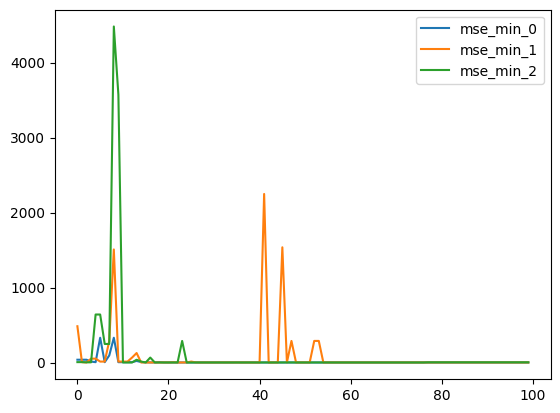

In [16]:
plot_col_one_stat('mse', 'min')

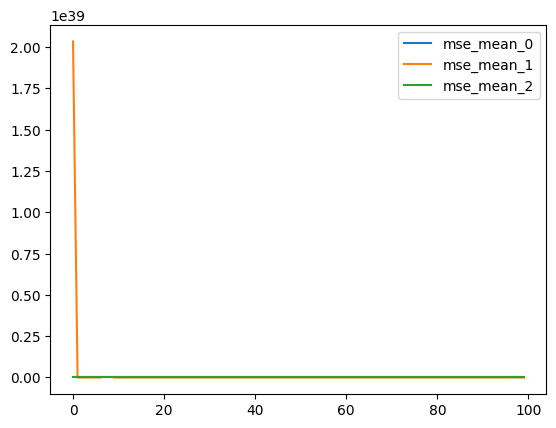

In [17]:
plot_col_one_stat('mse', 'mean')

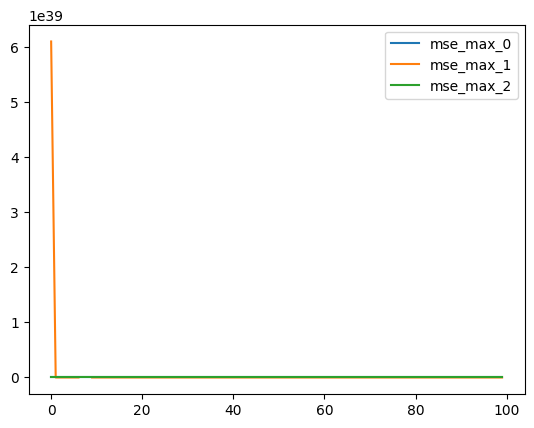

In [18]:
plot_col_one_stat('mse', 'max')

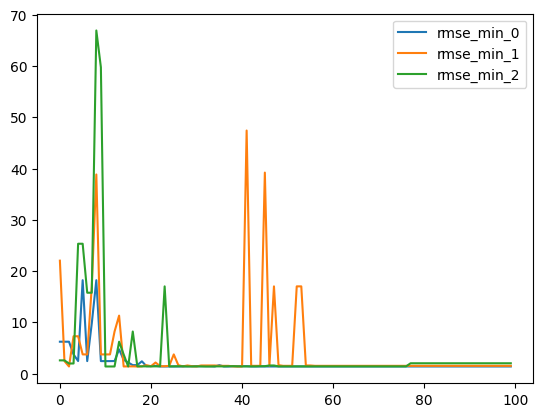

In [19]:
plot_col_one_stat('rmse', 'min')

In [20]:
def plot_col(col):
    for stat in ('min', 'mean', 'max'):
        plot_col_one_stat(col, stat)

In [21]:
def some_graphs():
    go, end = 5, 11
    while go < len(cols):
        for col in cols[go:end]:
            print(col)
            plot_col(col)
        yield
        go, end = end, end+6

size
depth
raw_fitness
fitness
value
crossover_rate


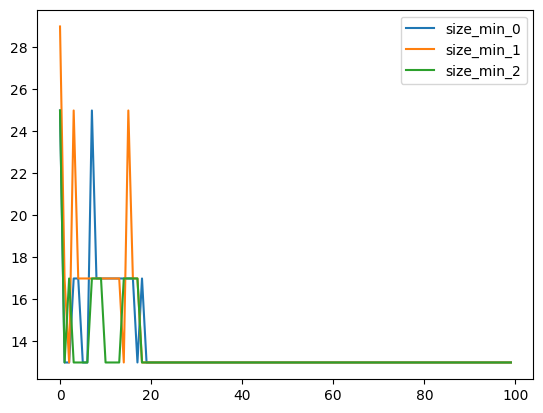

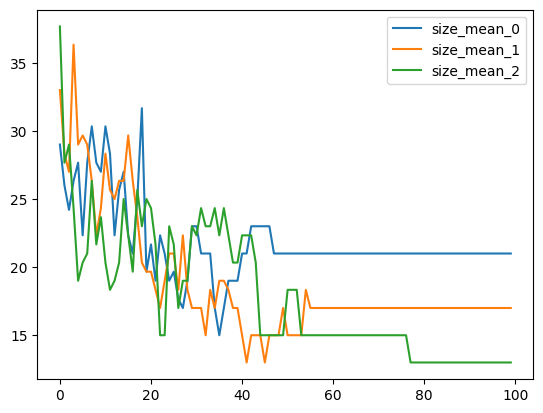

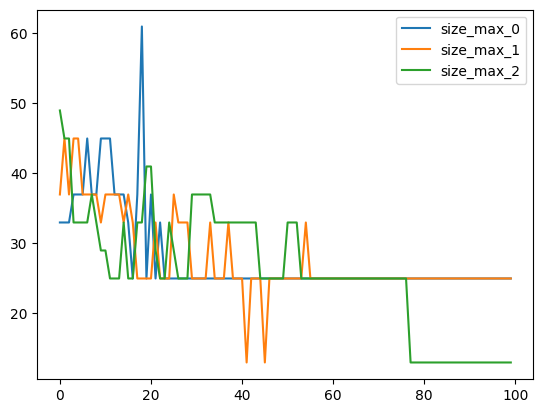

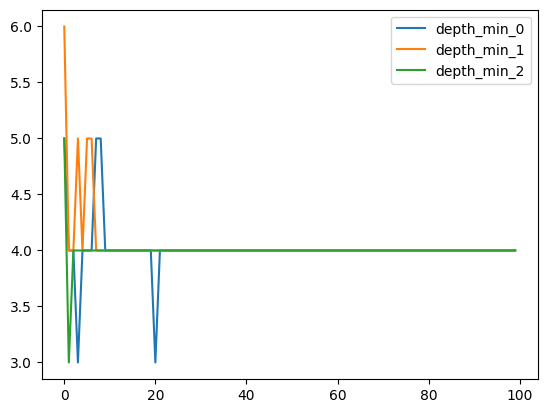

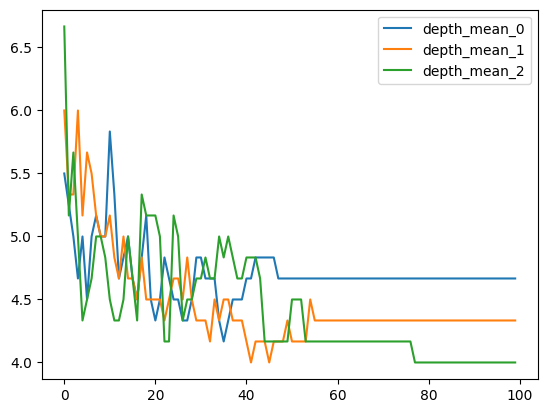

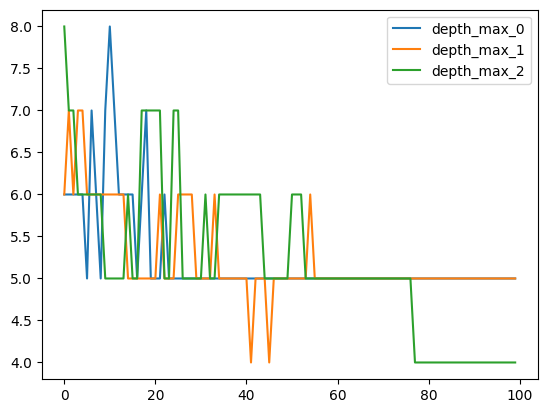

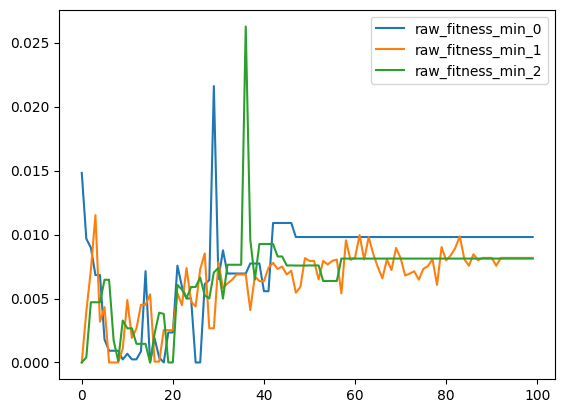

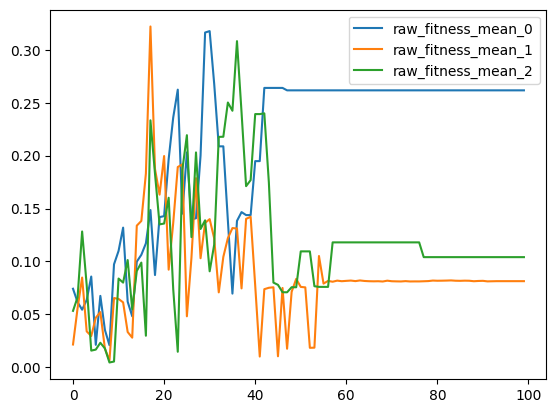

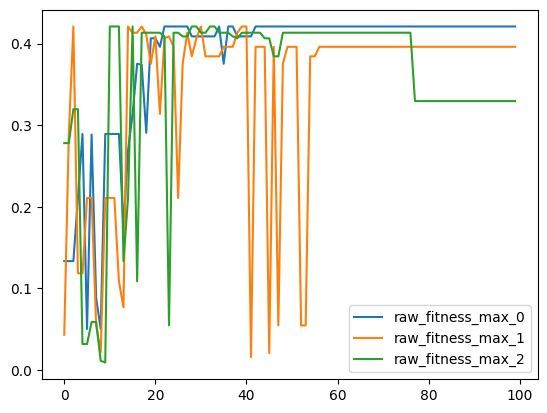

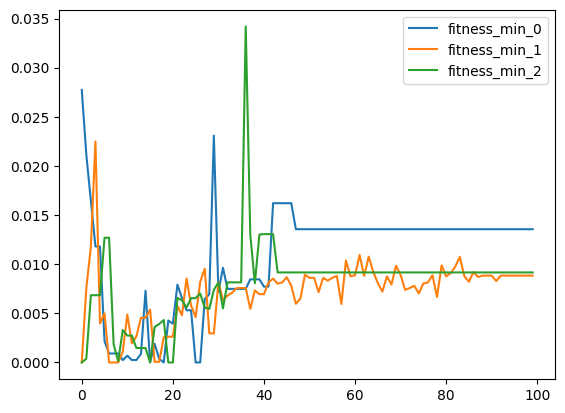

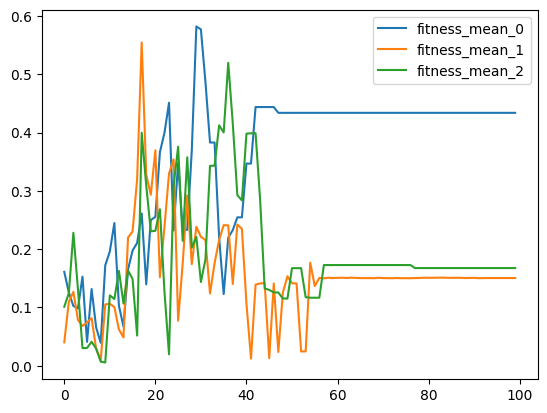

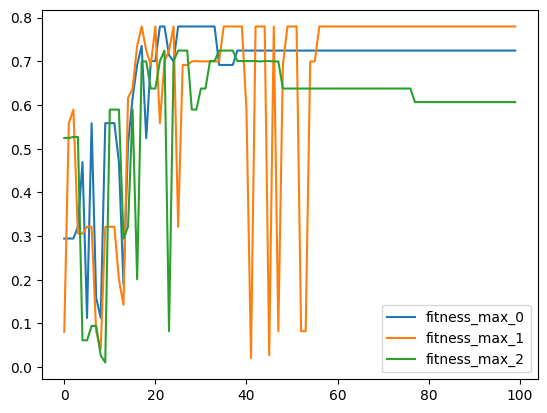

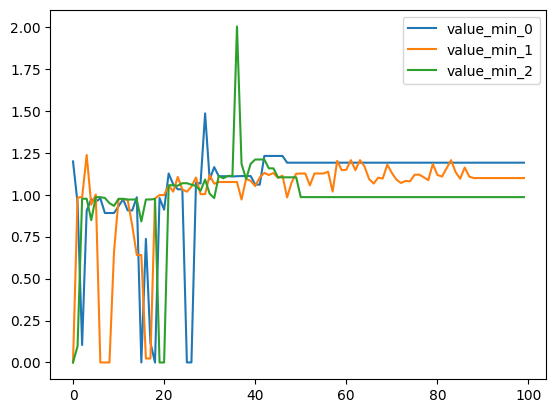

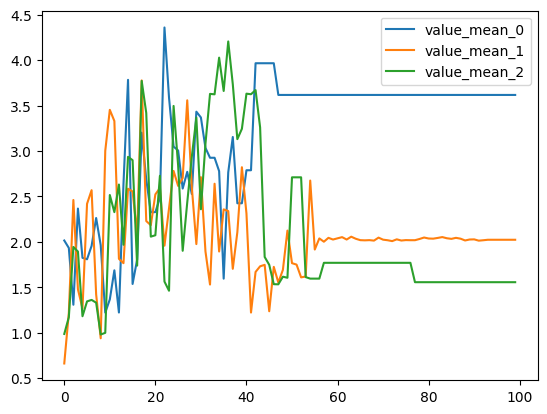

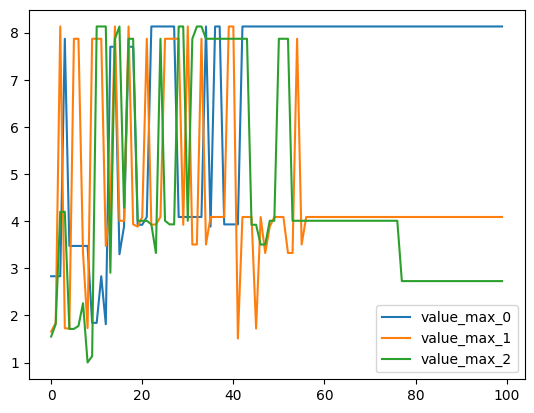

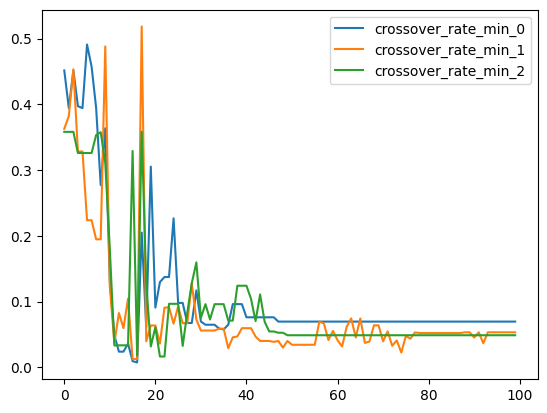

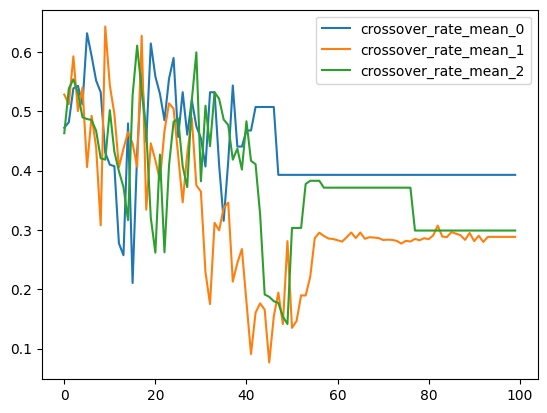

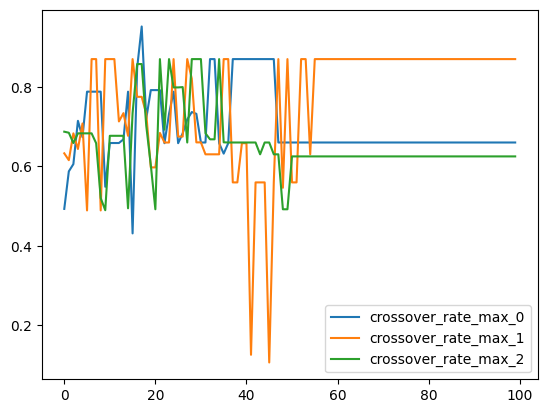

In [22]:
graph_it = some_graphs()
next(graph_it)

mutation_rate
mutation_sd
max_depth
max_size
temp_coeff
pop


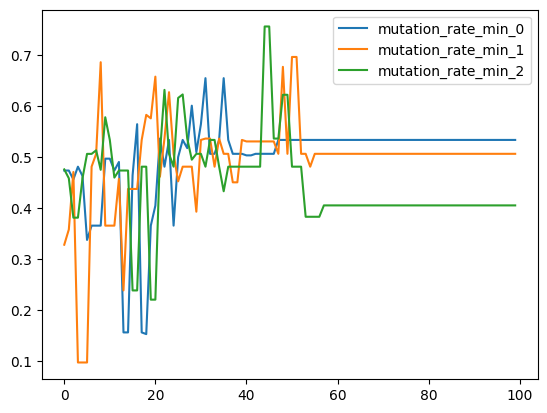

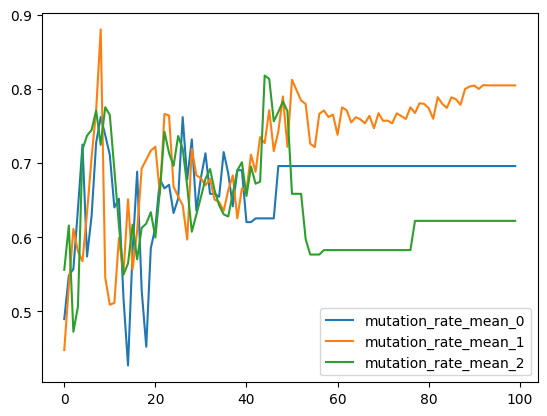

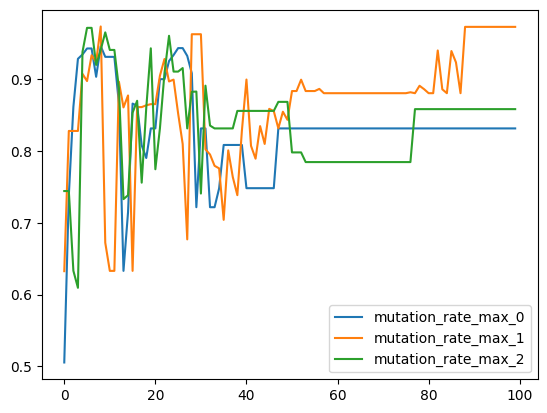

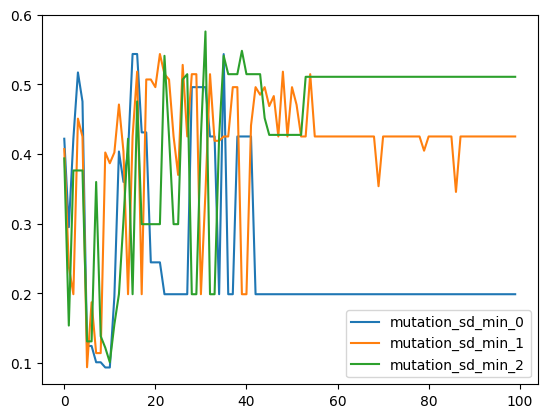

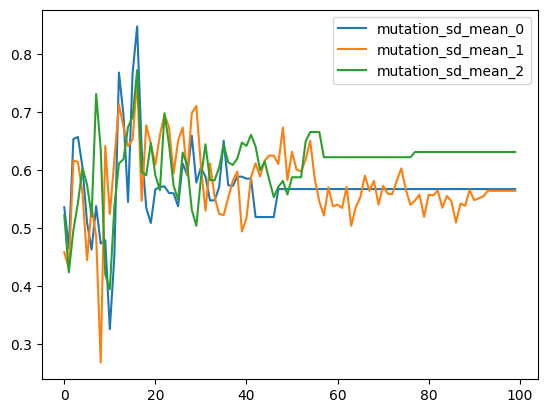

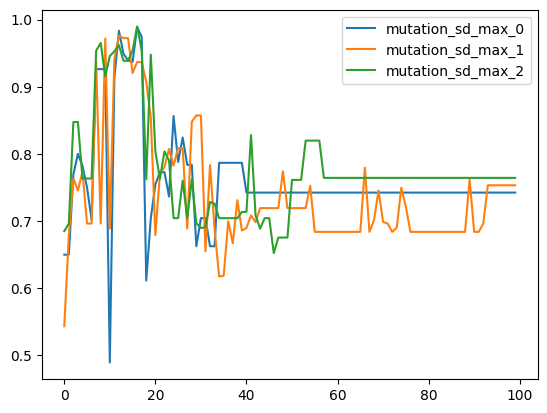

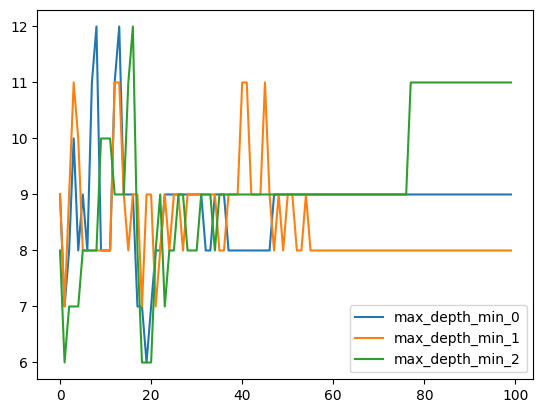

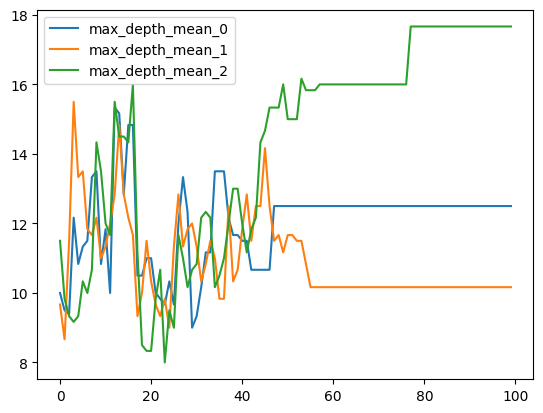

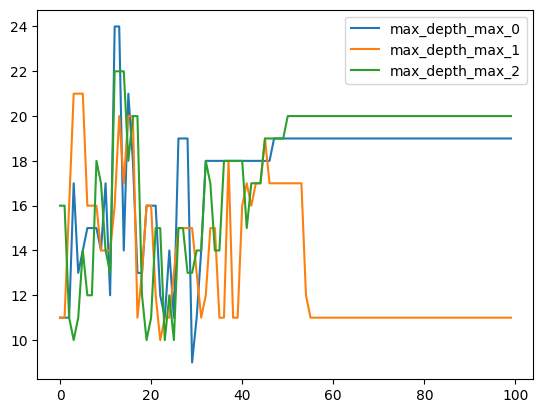

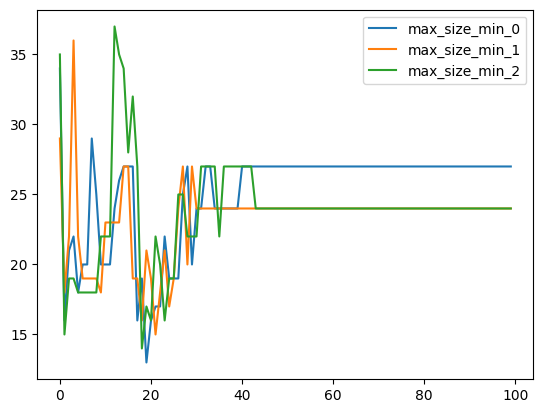

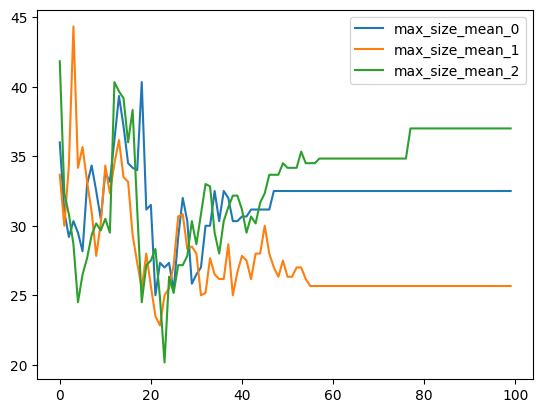

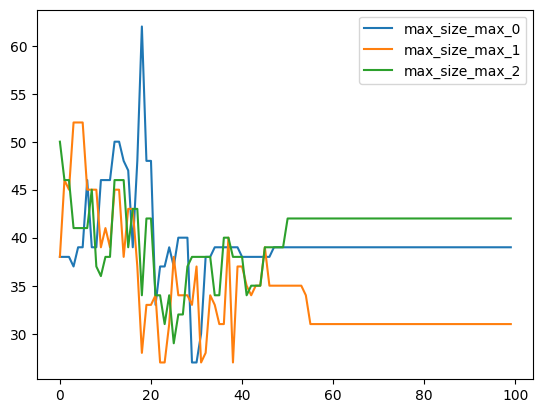

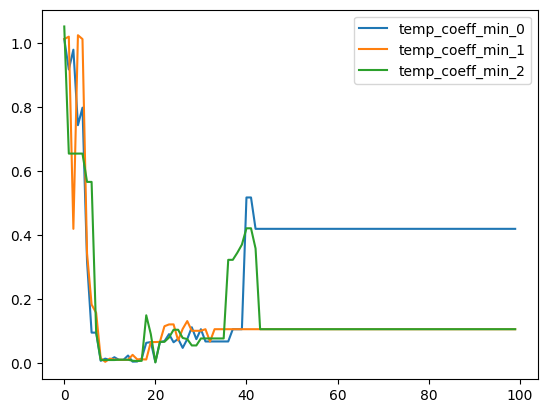

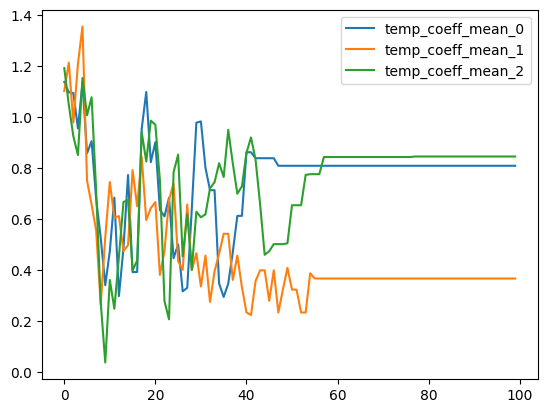

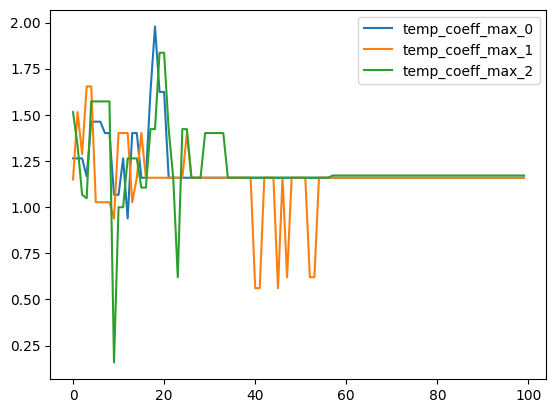

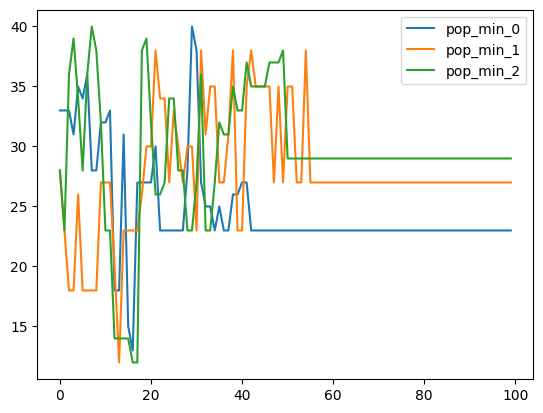

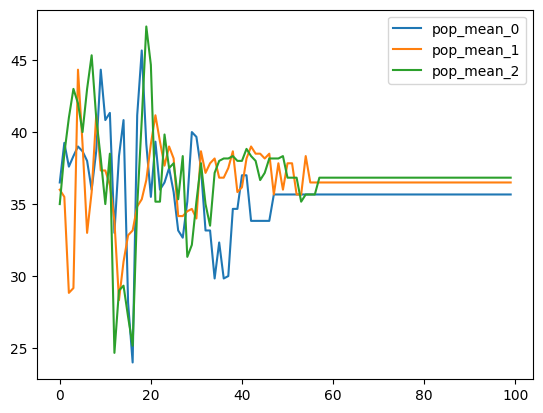

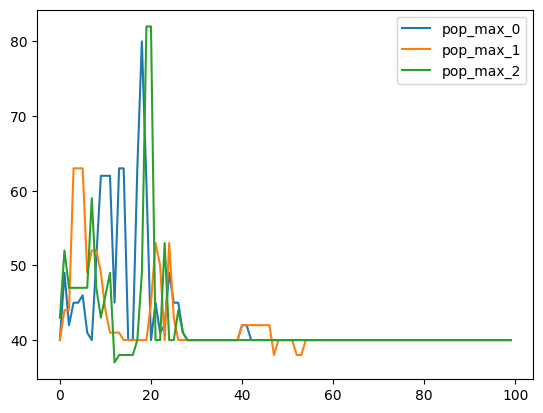

In [23]:
next(graph_it)

elitism
obs_start
obs_stop
obs_num
obs_width


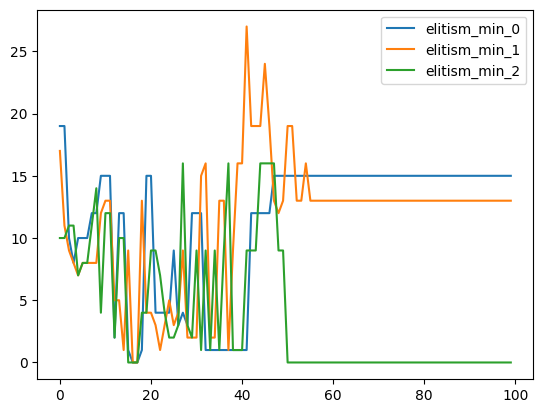

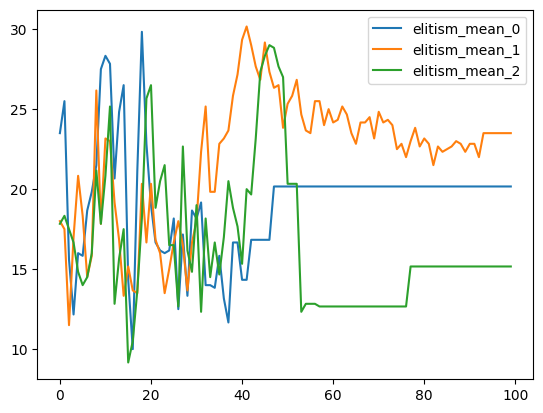

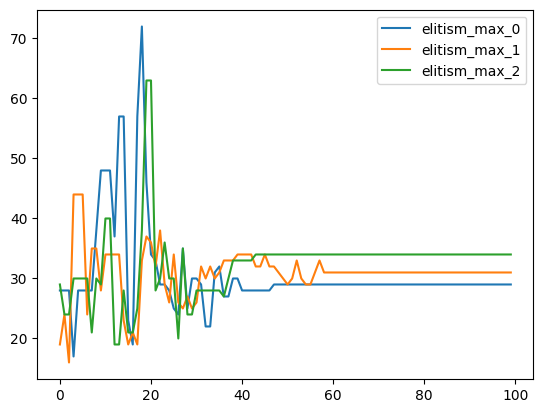

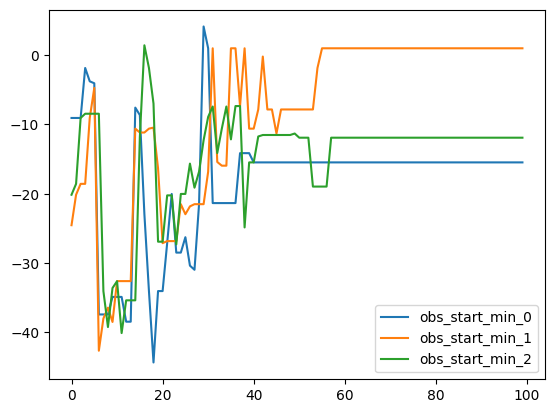

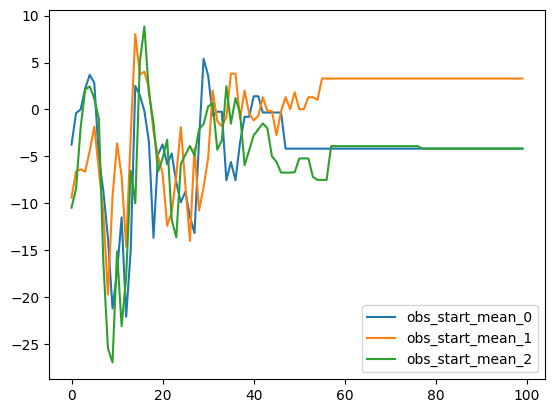

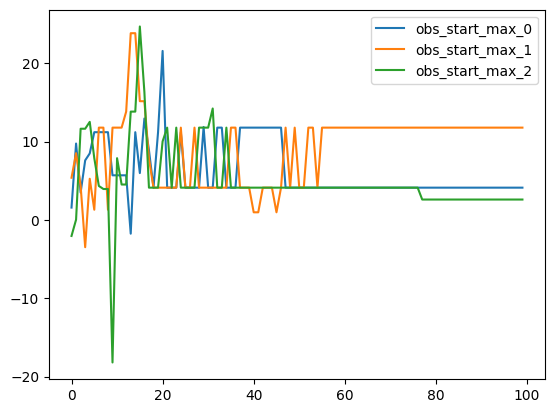

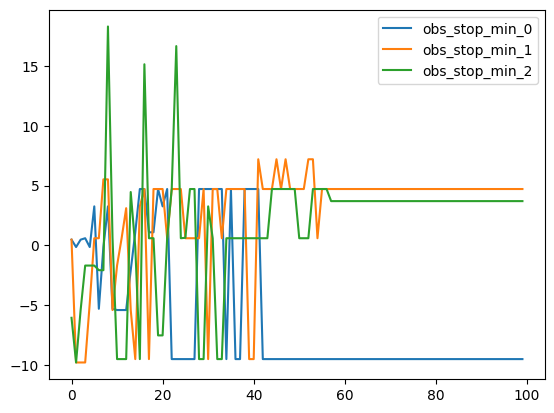

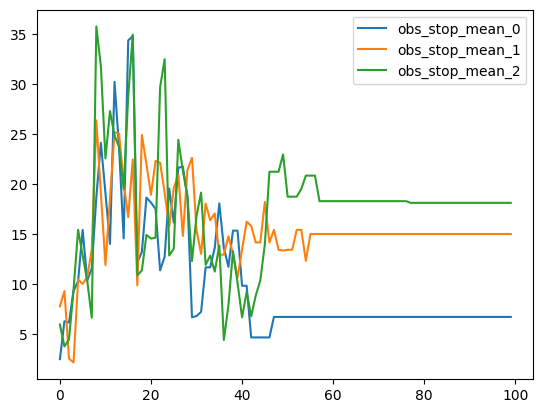

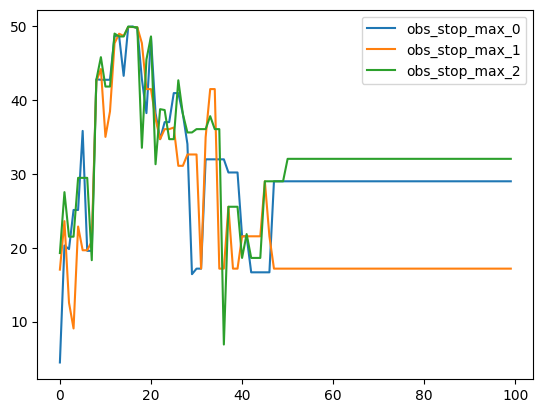

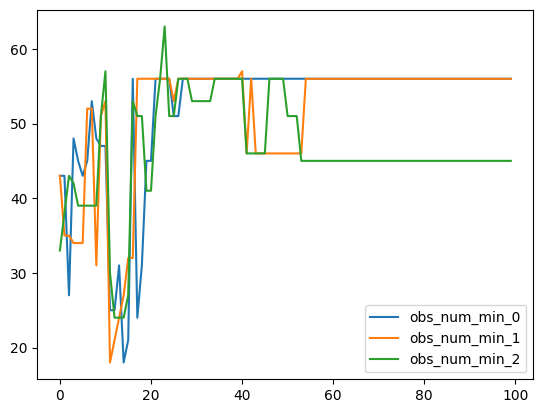

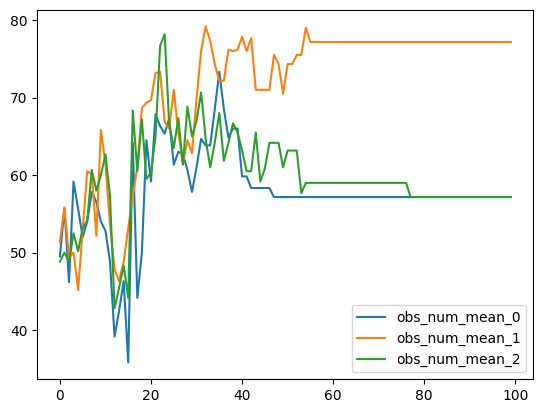

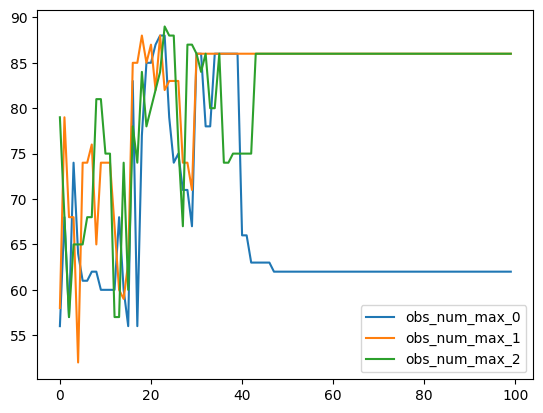

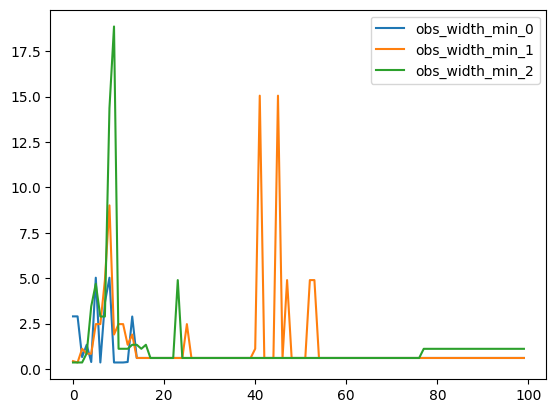

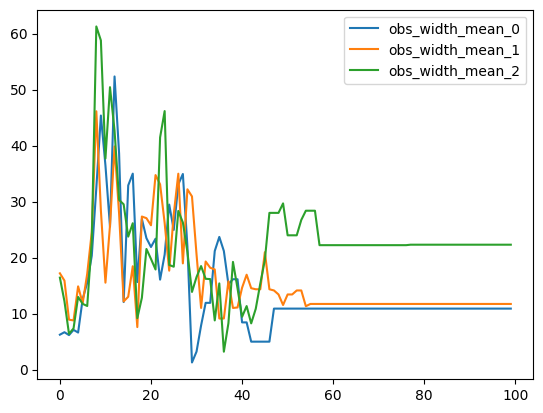

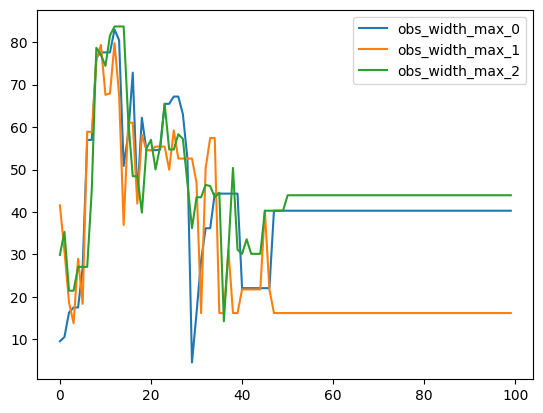

In [24]:
next(graph_it)

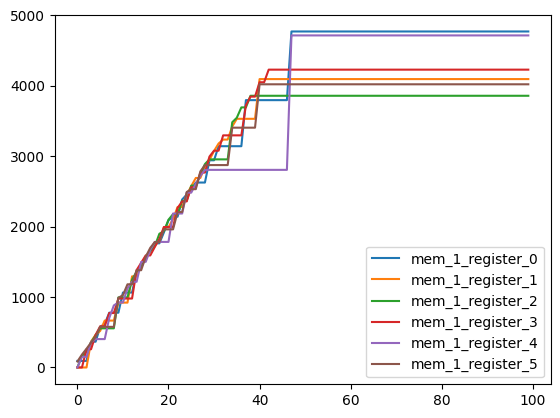

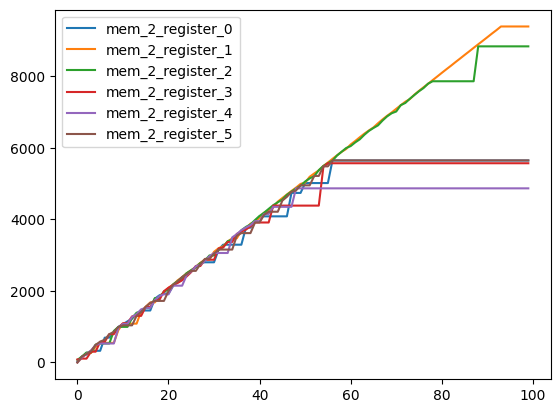

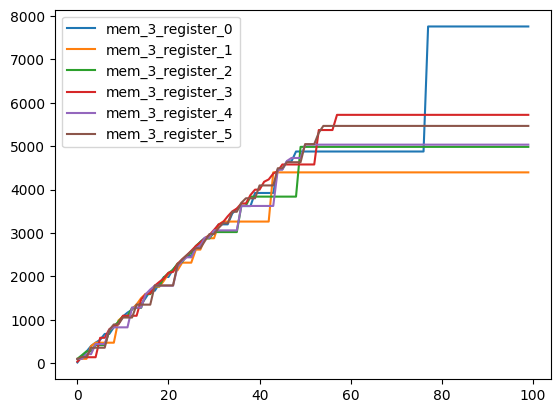

In [25]:
for j in range(1, 4):
    t_vals = pd.DataFrame()
    for i in range(6):
        t_vals[f'mem_{j}_register_{i}'] = [df.at[i, 't'] for df in data[j]]
    t_vals.plot()

In [26]:
def get_bests(targ: str, data: list[pd.DataFrame]|list[list[pd.DataFrame]], max=True):
    if isinstance(data[0], list) and isinstance(data[0][0], pd.DataFrame):
        data = [pd.concat(dfs, ignore_index=True) for dfs in zip(*data[1:4])]
    bests = pd.DataFrame()
    cols = data[0].columns[3:]
    for col in cols:
        best_vals = []
        for df in data:
            df_ = df[df['exists']]
            if max:
                best_vals.append(df_[col][df_[targ]==df_[targ].max()].item())
            else:
                best_vals.append(df_[col][df_[targ]==df_[targ].min()].item())
        bests[col] = best_vals
    return bests
    


In [29]:
def plot_bests(targ, data, max=True):
    bests = get_bests(targ, data, max=max)
    for col in bests:
        pd.DataFrame({col: bests[col]}).plot(title=col)

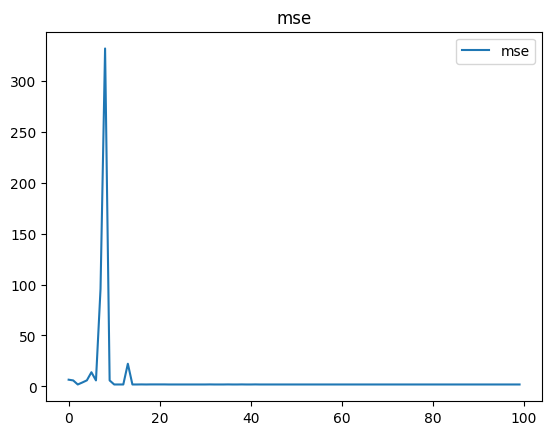

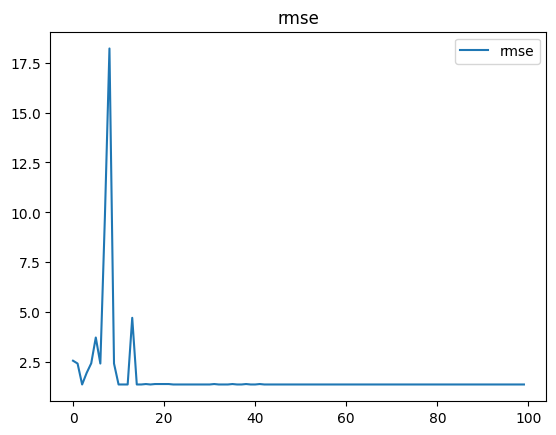

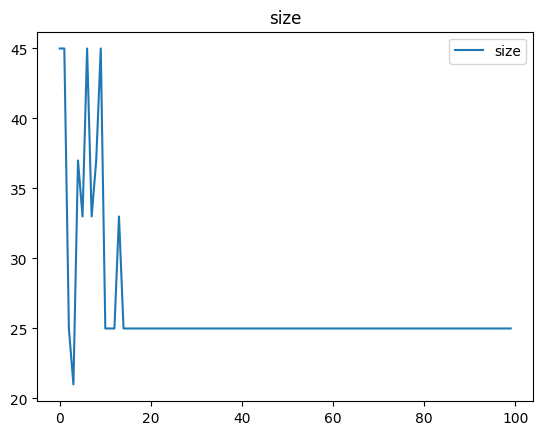

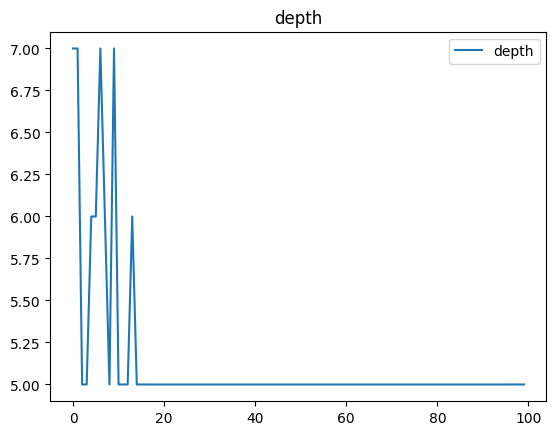

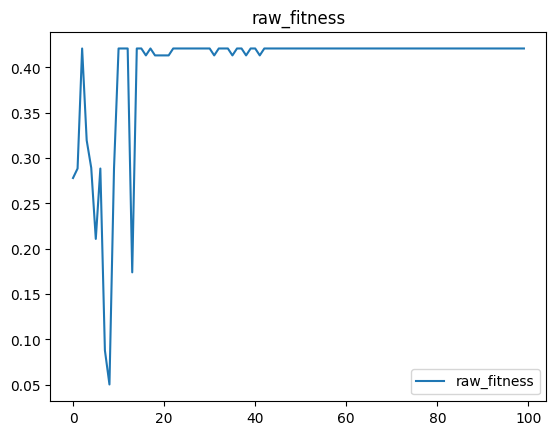

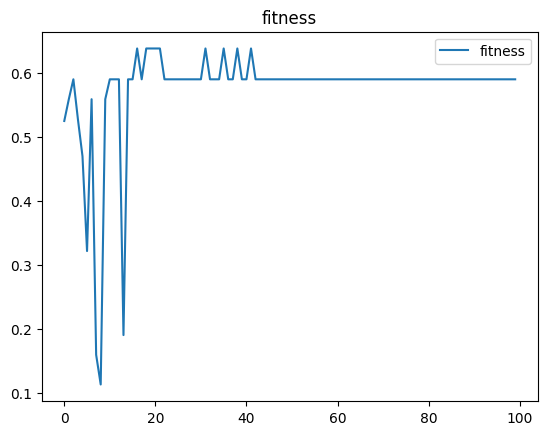

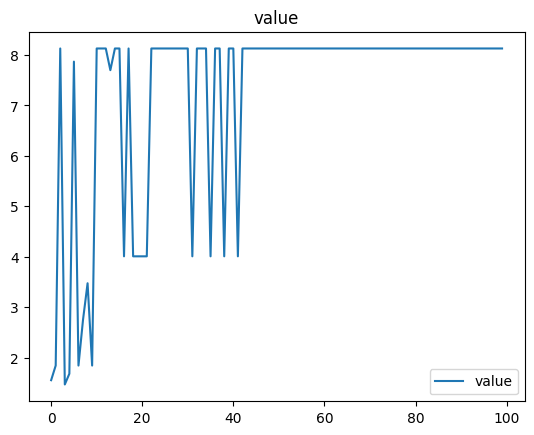

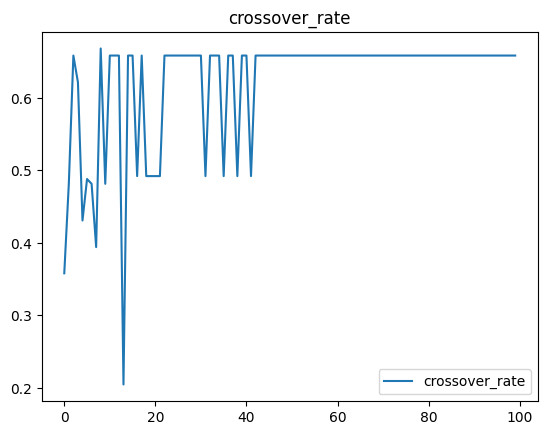

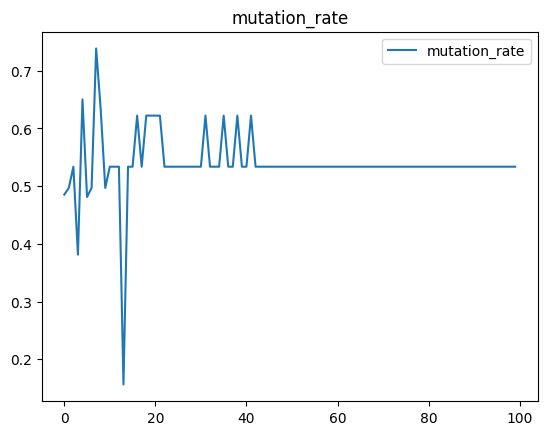

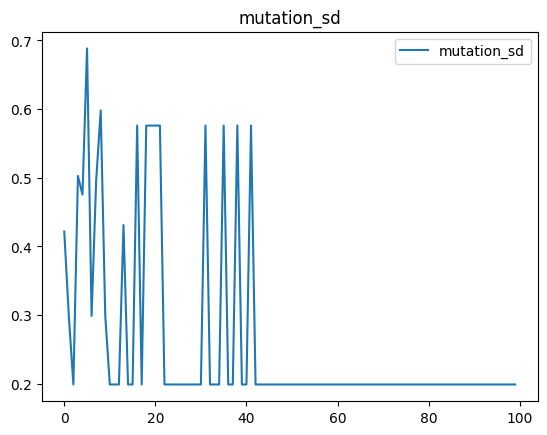

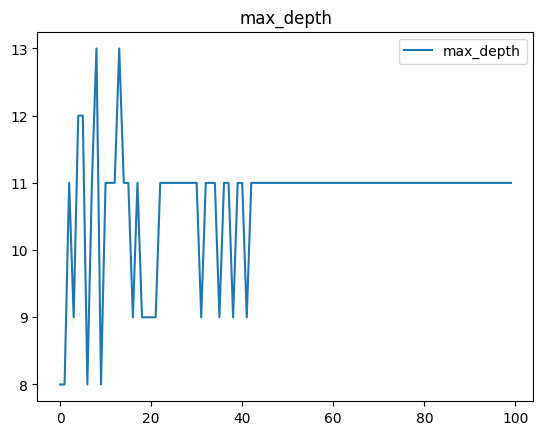

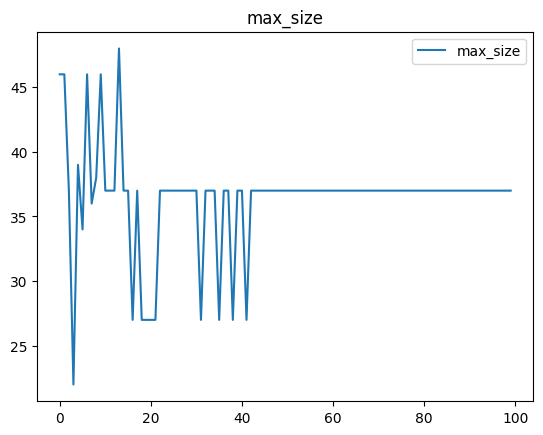

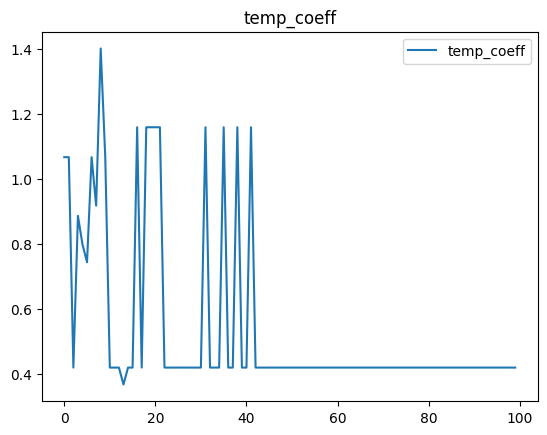

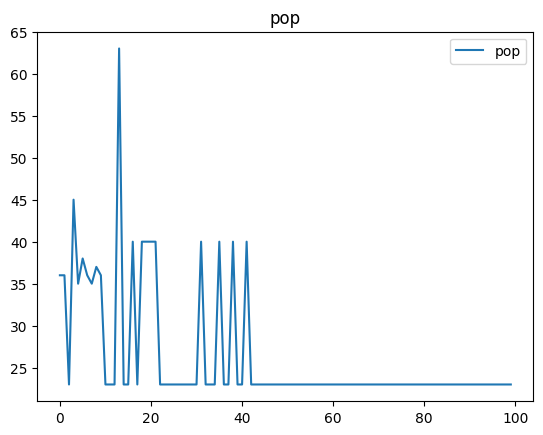

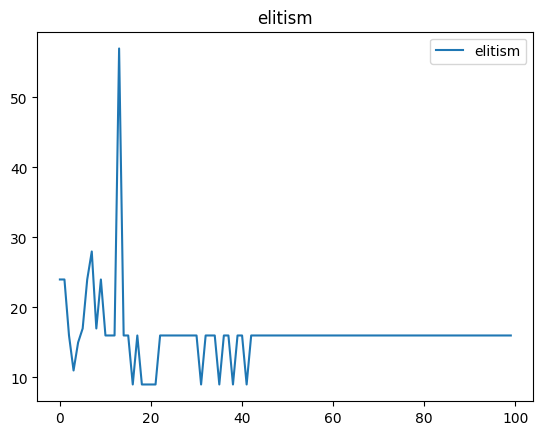

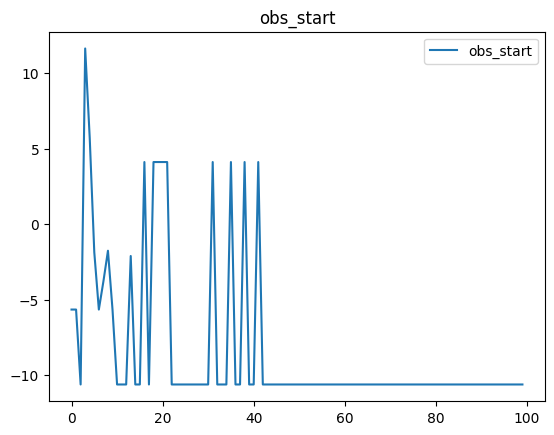

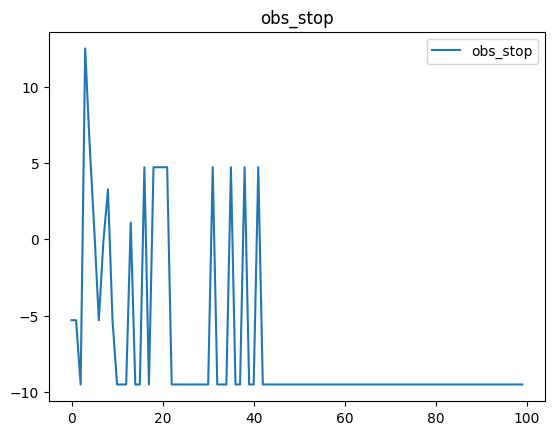

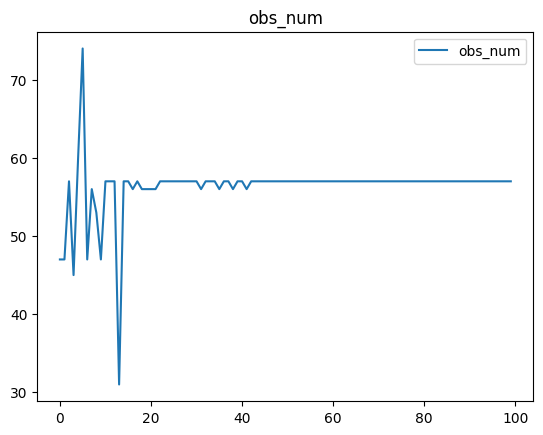

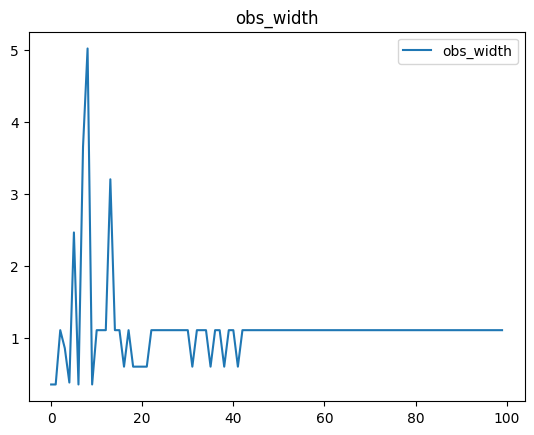

In [42]:
plot_bests('mse', data, max=False)

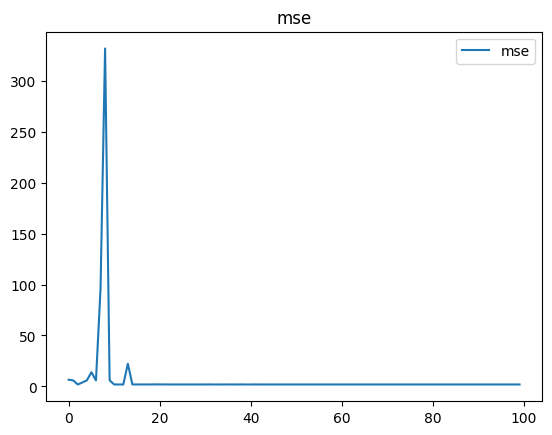

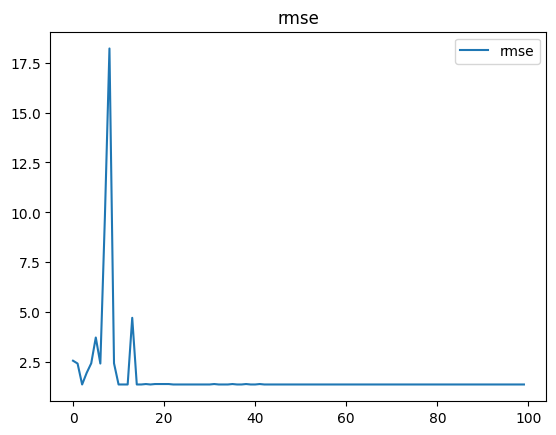

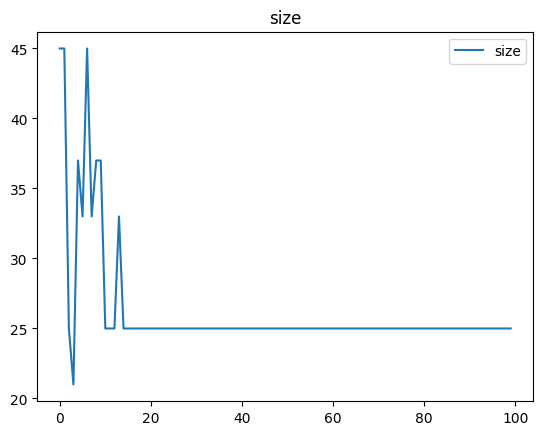

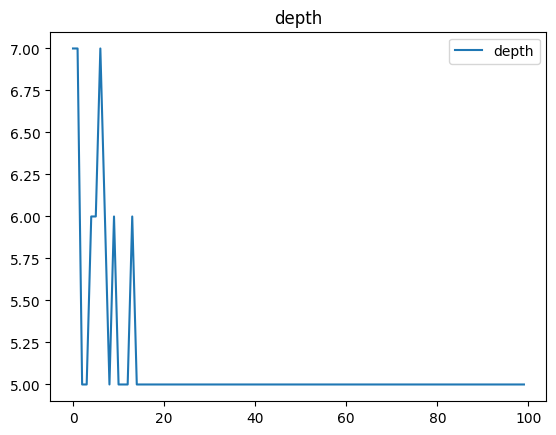

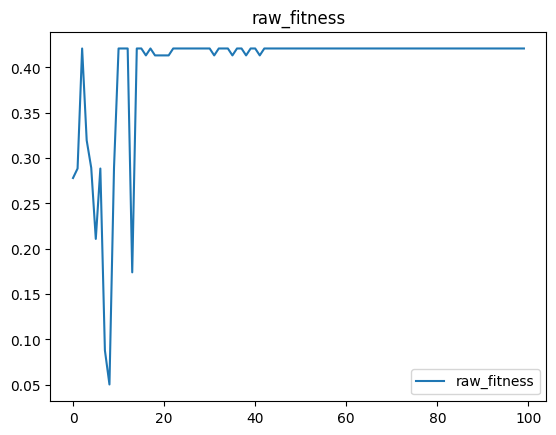

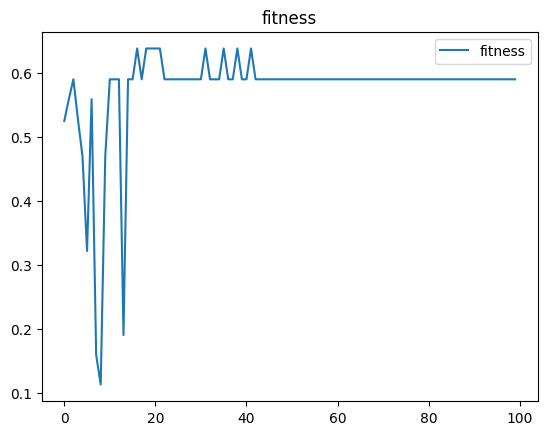

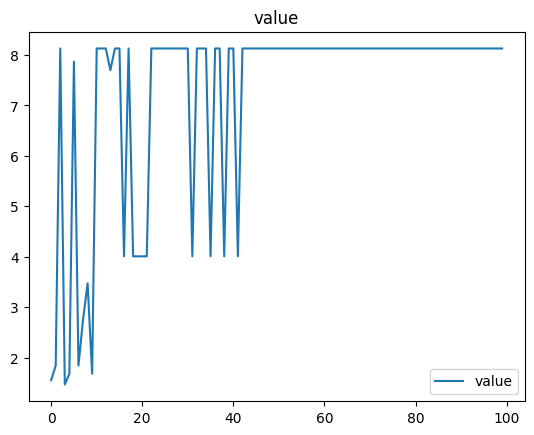

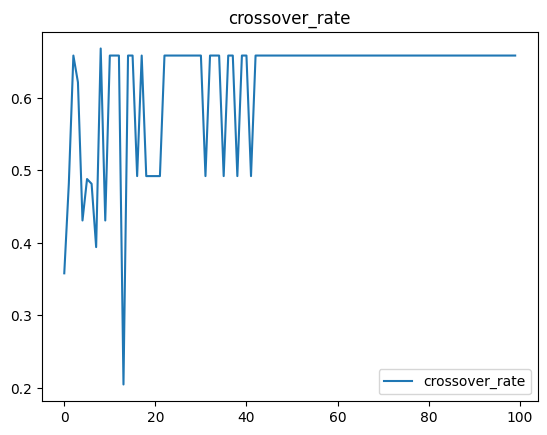

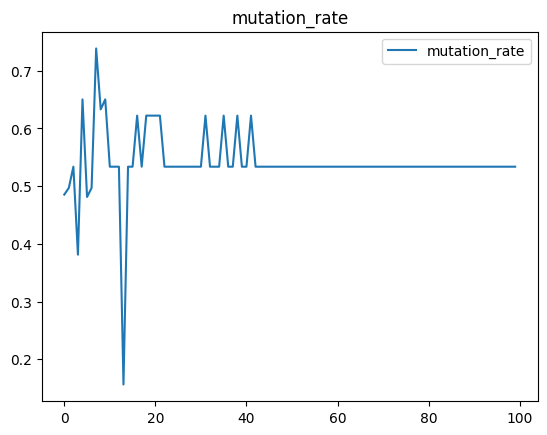

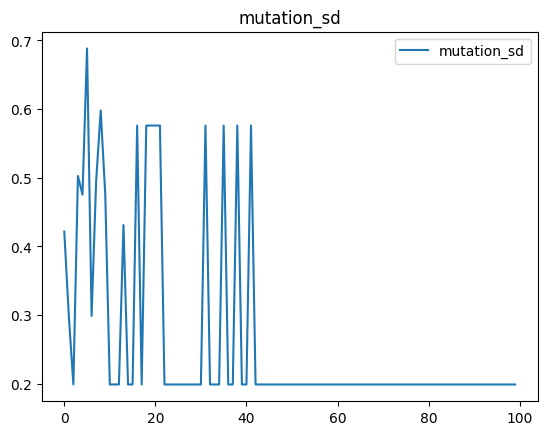

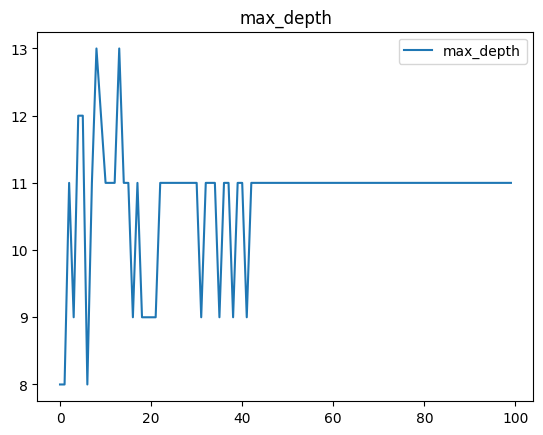

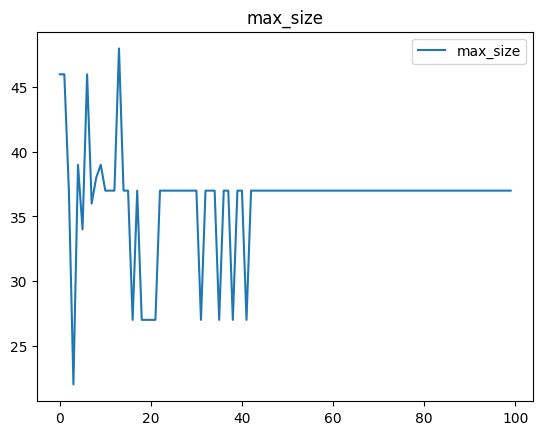

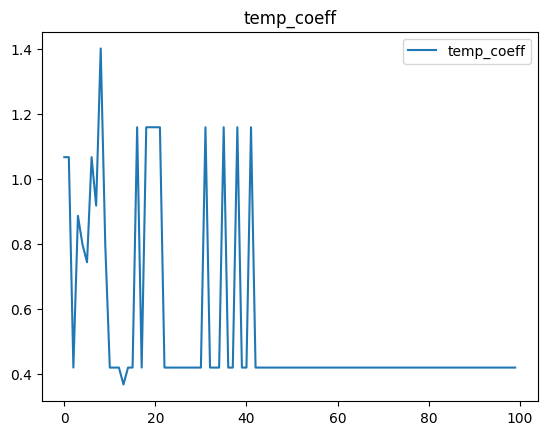

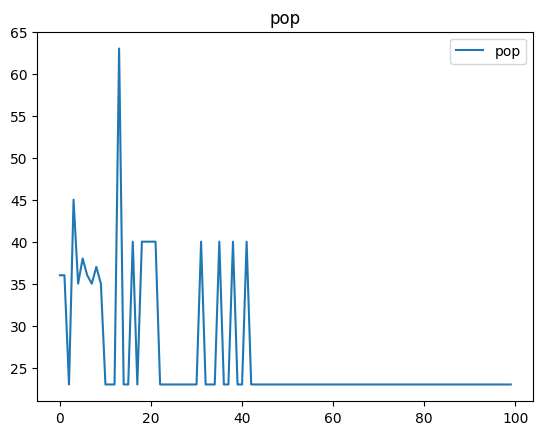

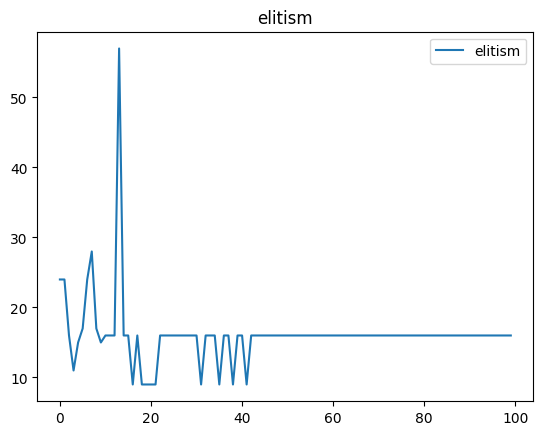

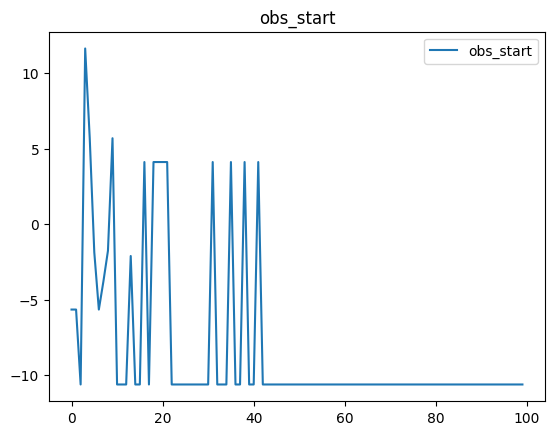

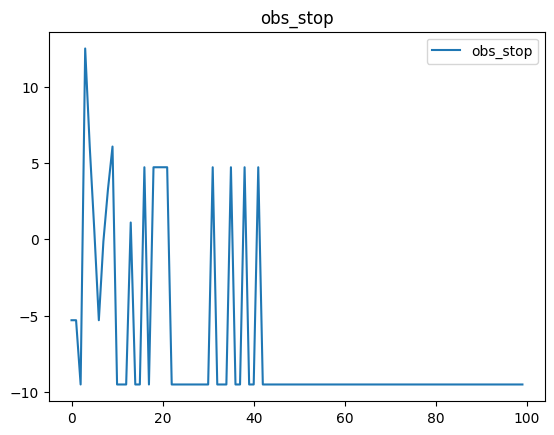

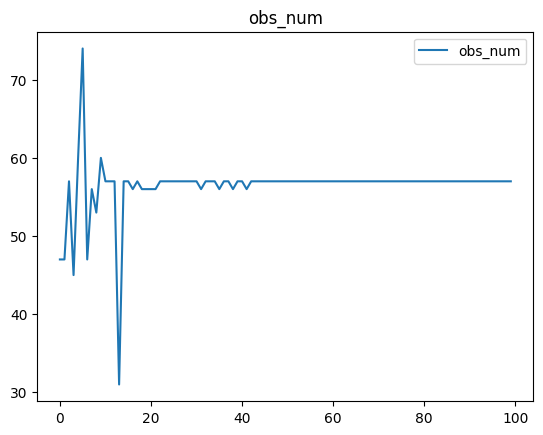

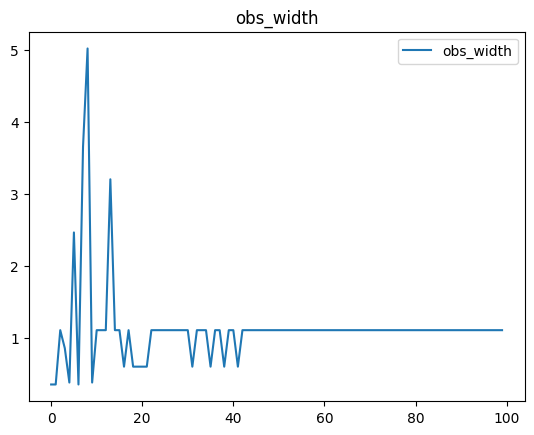

In [43]:
plot_bests('raw_fitness', data)

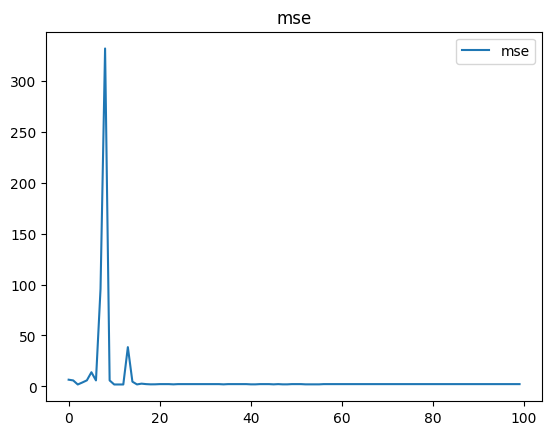

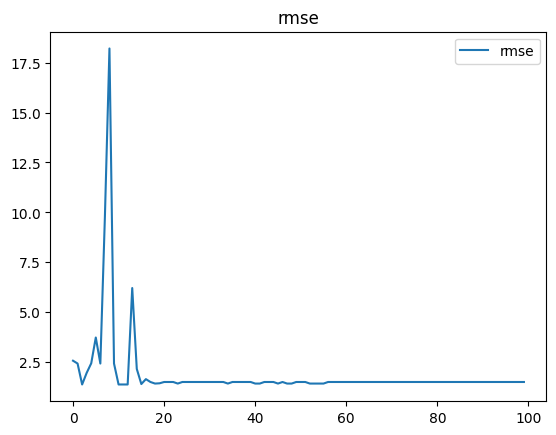

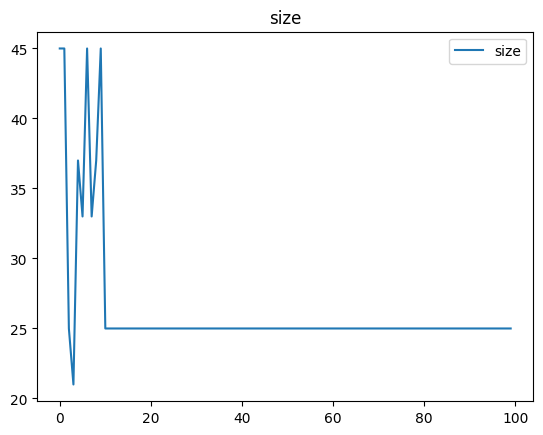

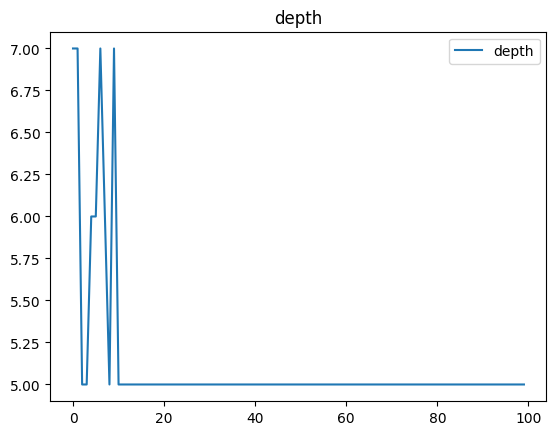

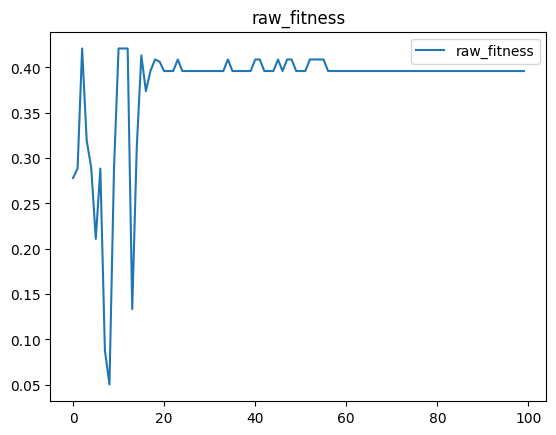

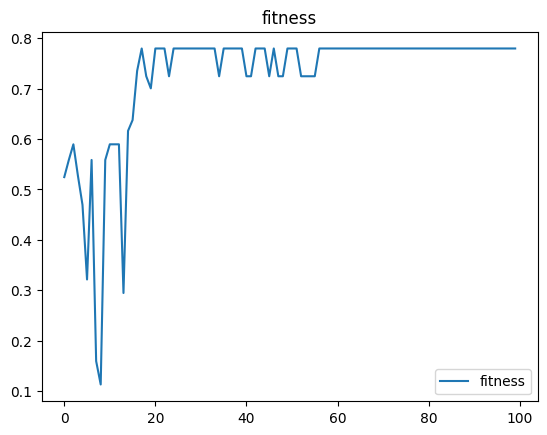

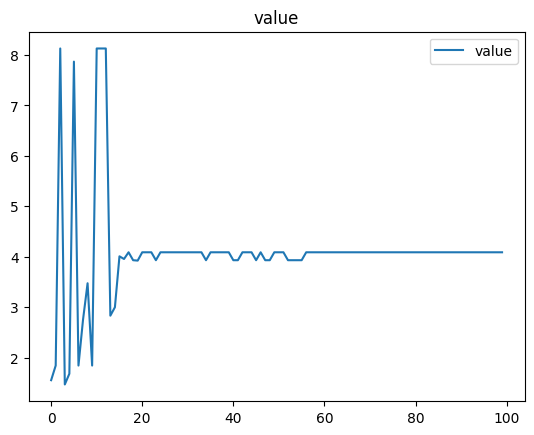

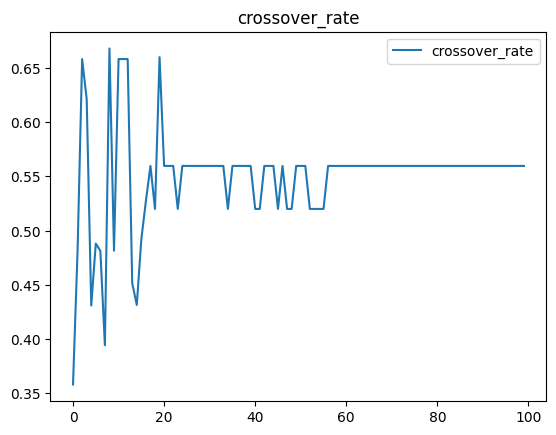

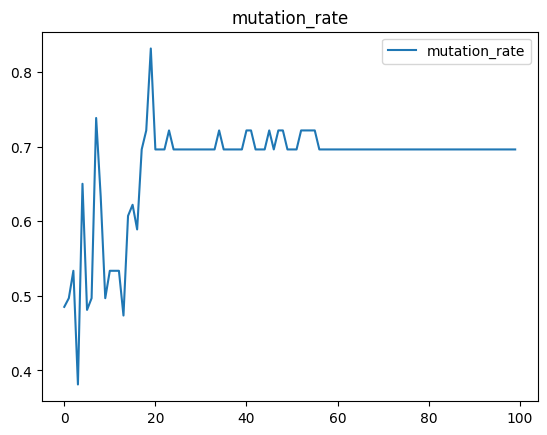

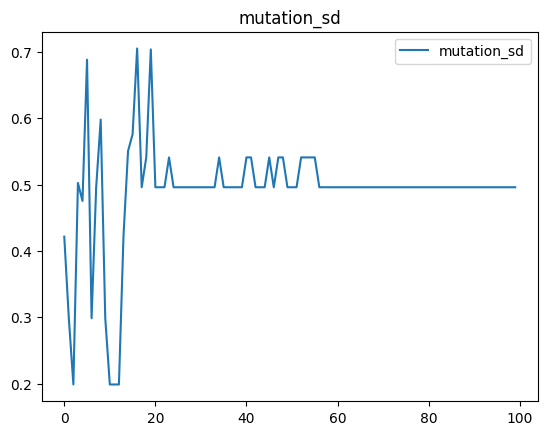

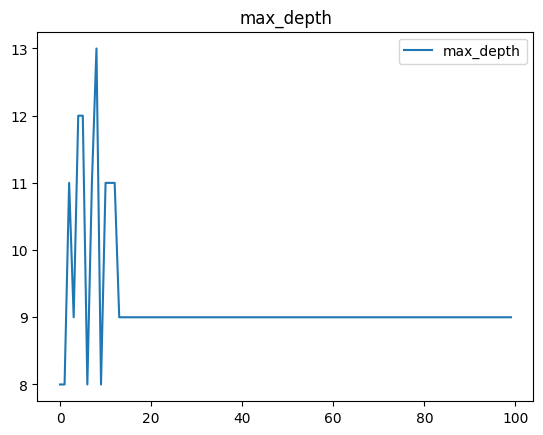

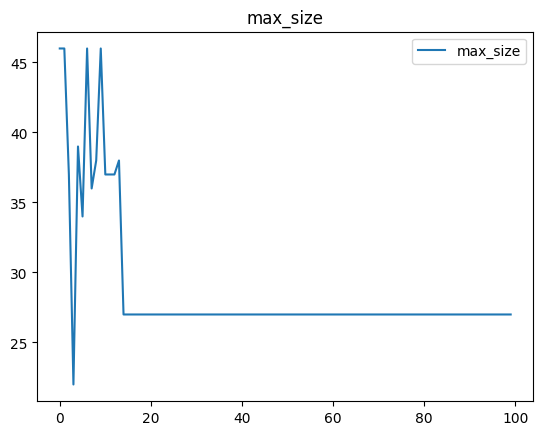

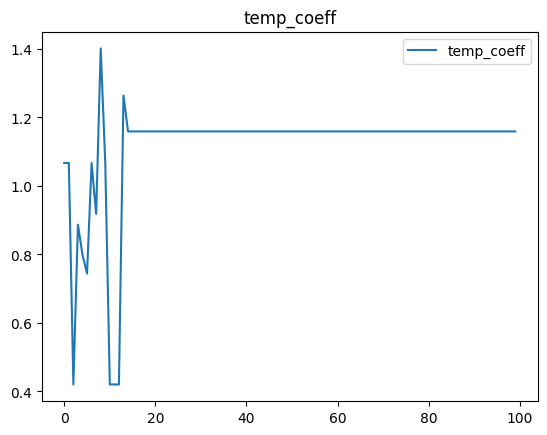

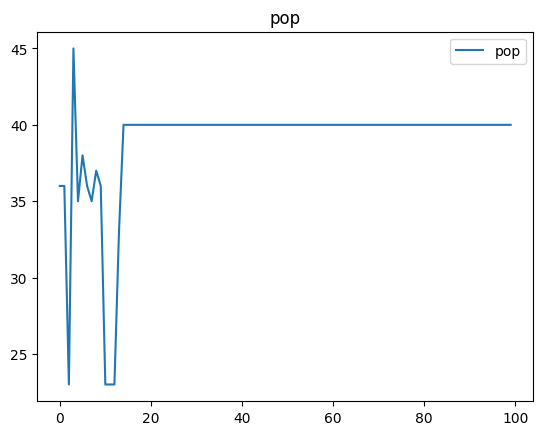

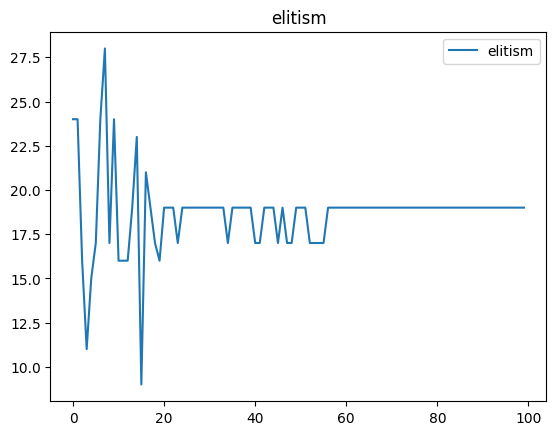

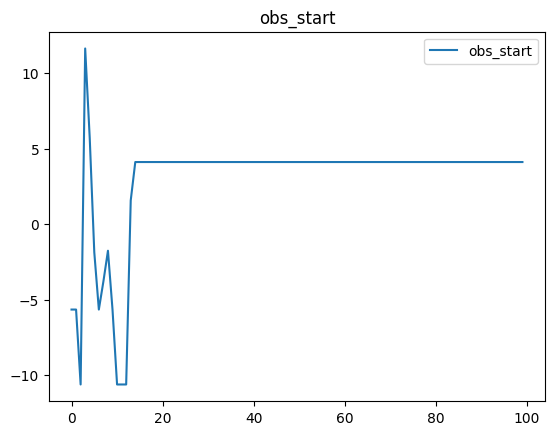

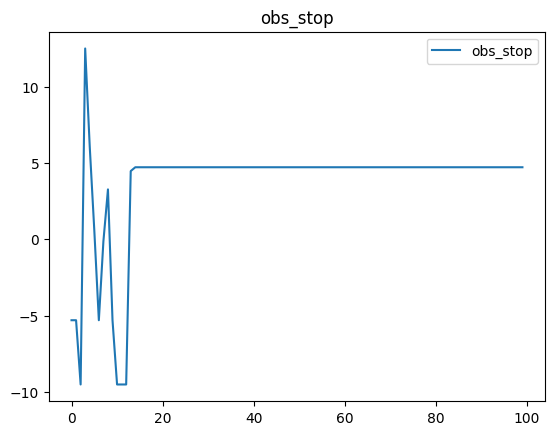

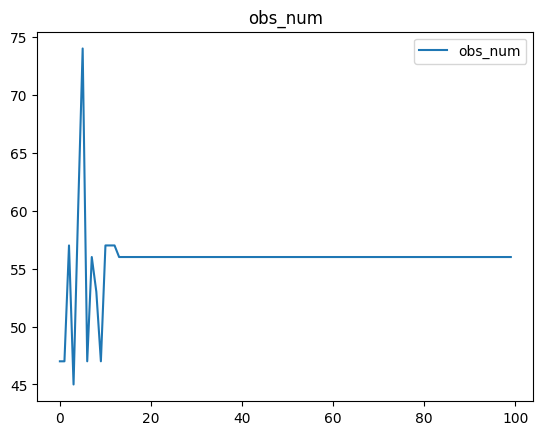

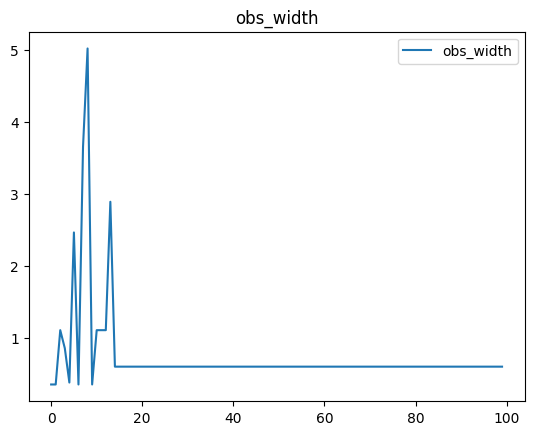

In [44]:
plot_bests('fitness', data)

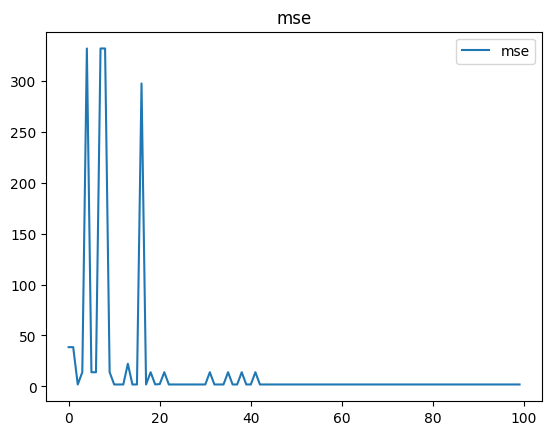

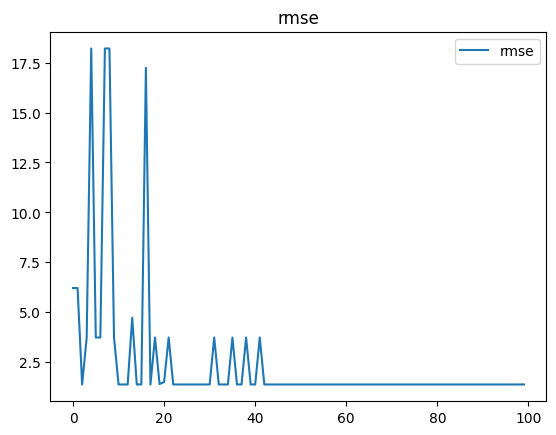

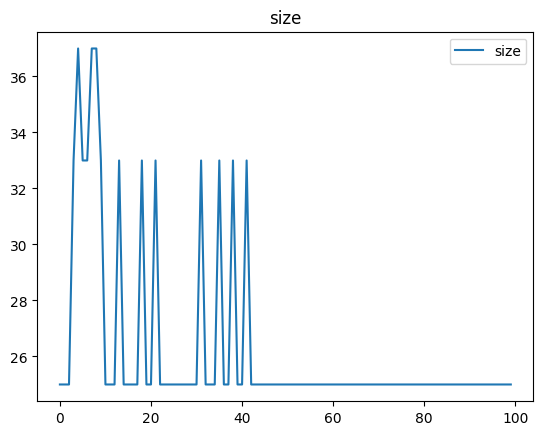

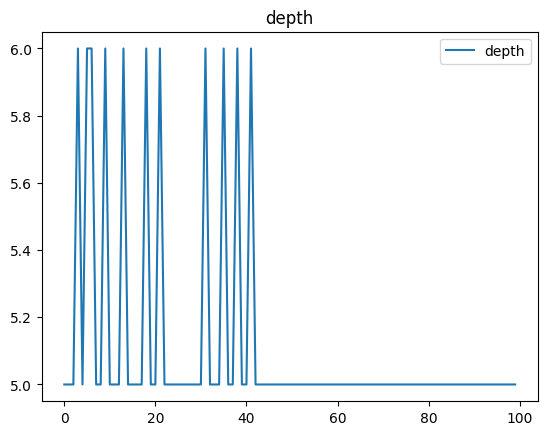

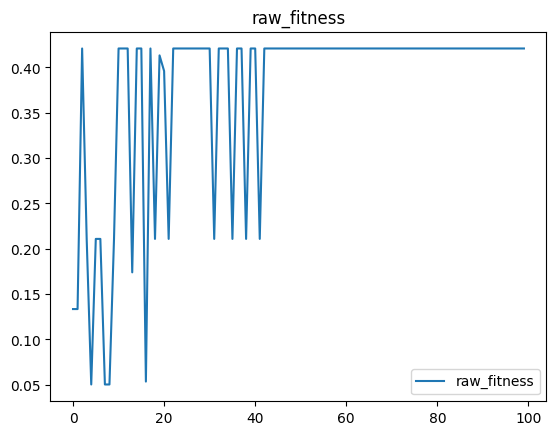

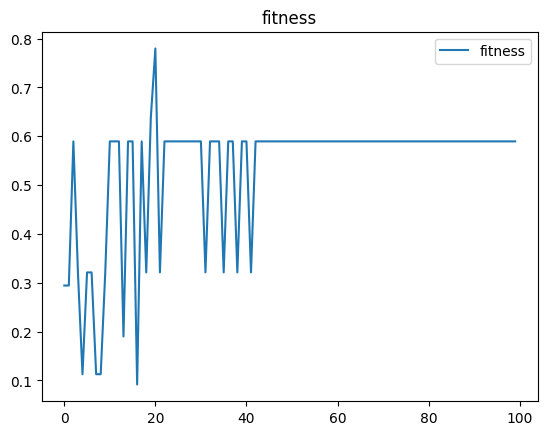

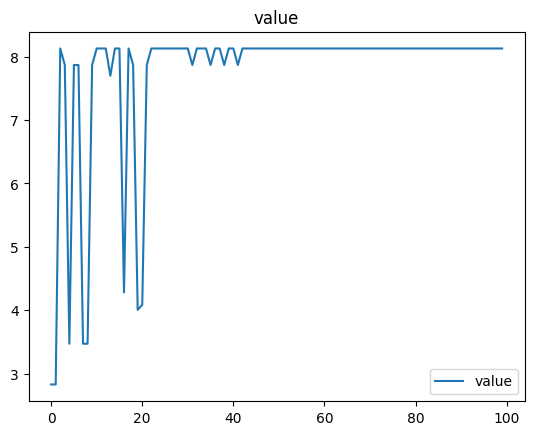

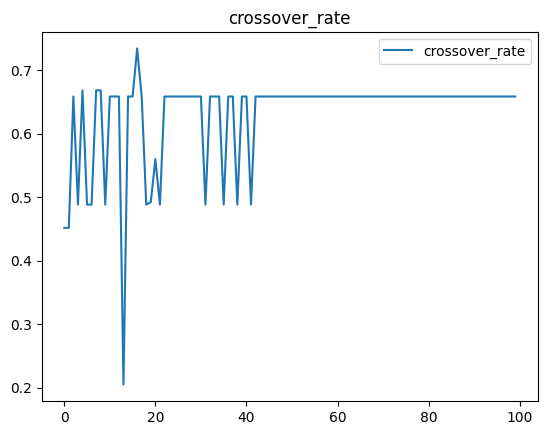

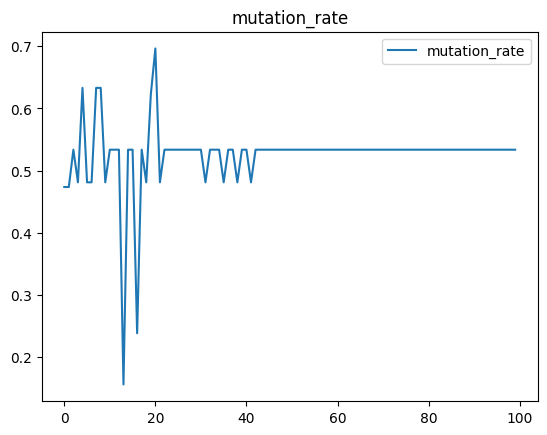

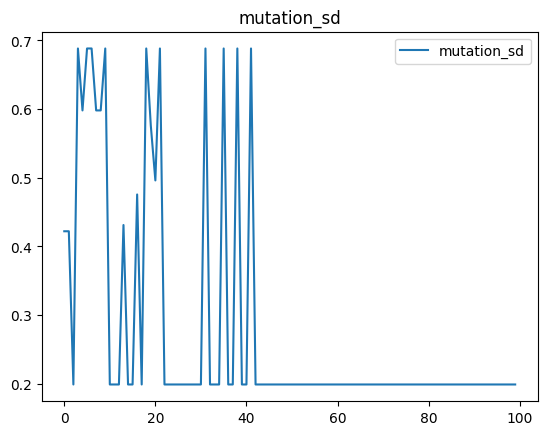

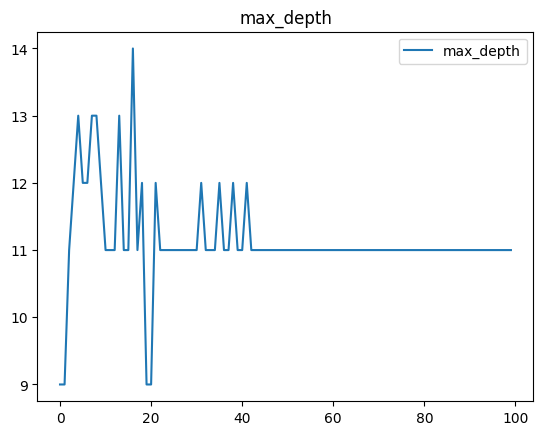

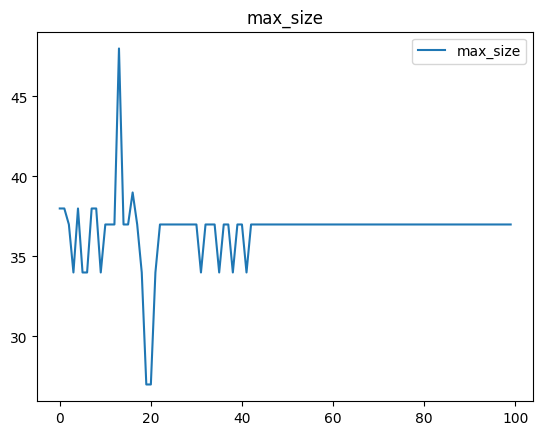

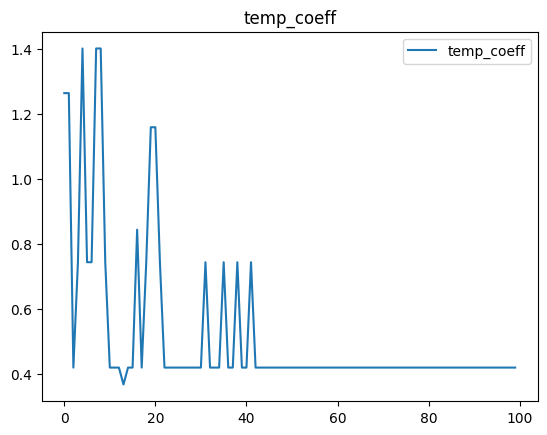

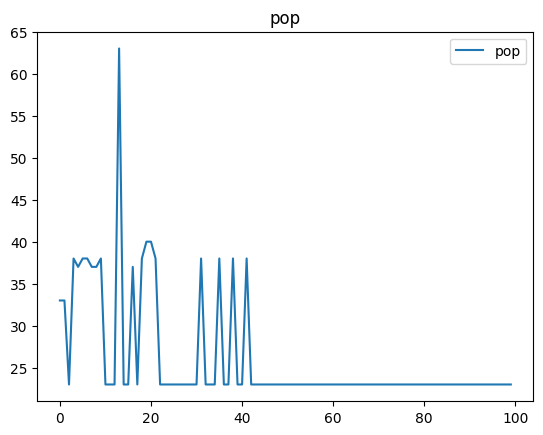

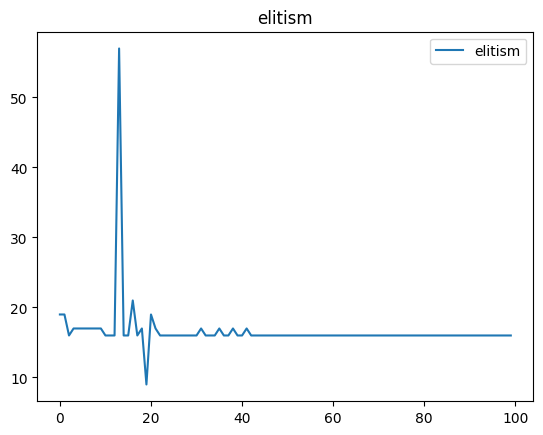

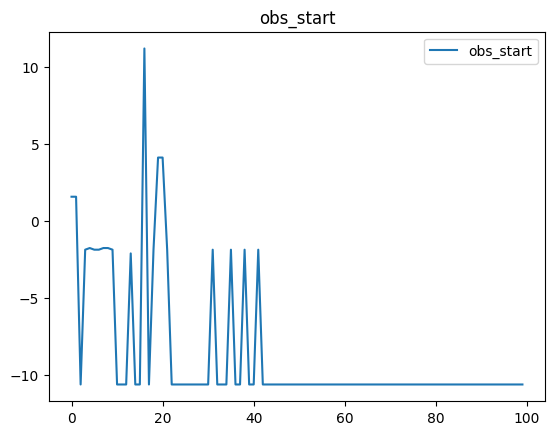

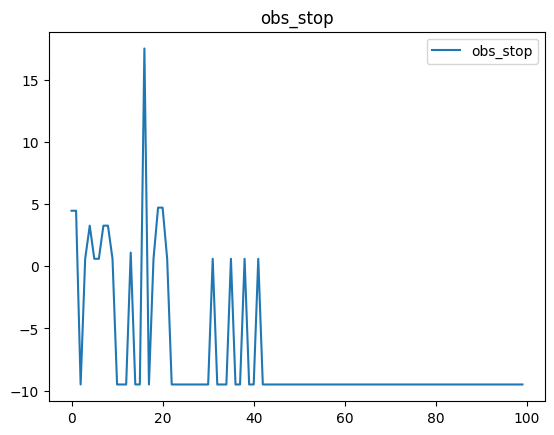

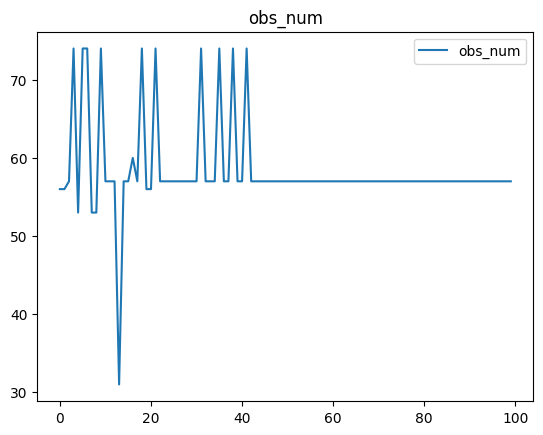

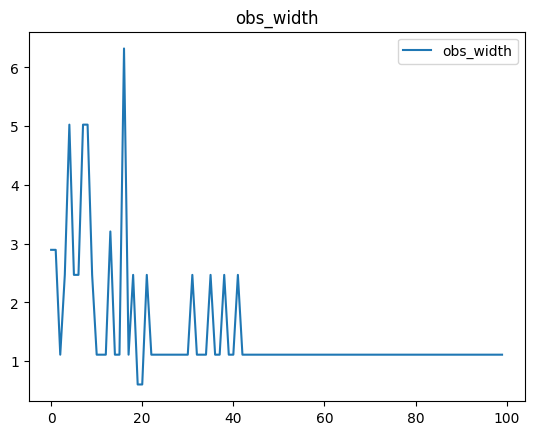

In [45]:
plot_bests('value', data)

In [46]:
def regress_all(targ: str, data: list[pd.DataFrame]|list[list[pd.DataFrame]]):
    print(targ)
    if isinstance(data[0], list) and isinstance(data[0][0], pd.DataFrame):
        data = [pd.concat(dfs, ignore_index=True) for dfs in zip(*data[1:4])]
    data = pd.concat(data)
    data = data[data['exists']]
    for col in data.columns[3:]:
        if col!=targ:
            data.plot(x=col, y=targ, kind='scatter', title=f'{col} vs {targ}')

value


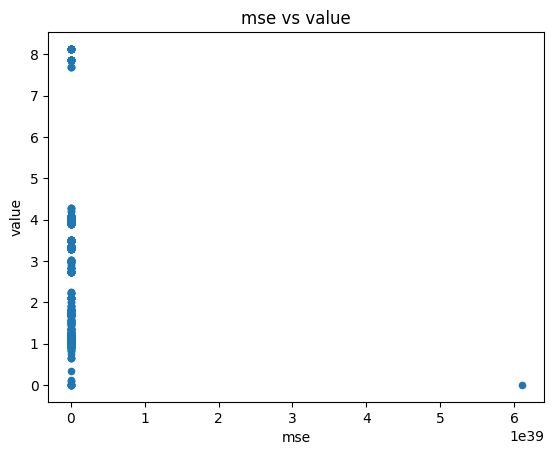

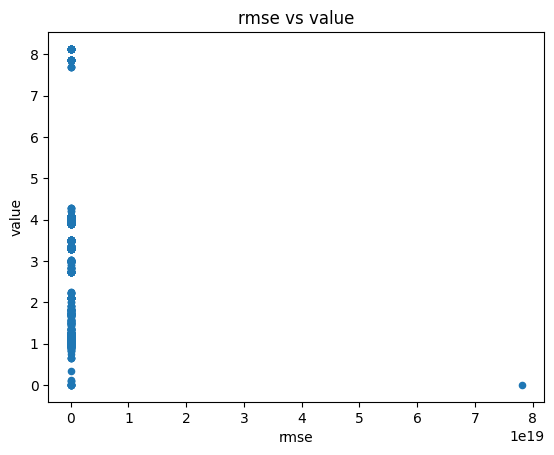

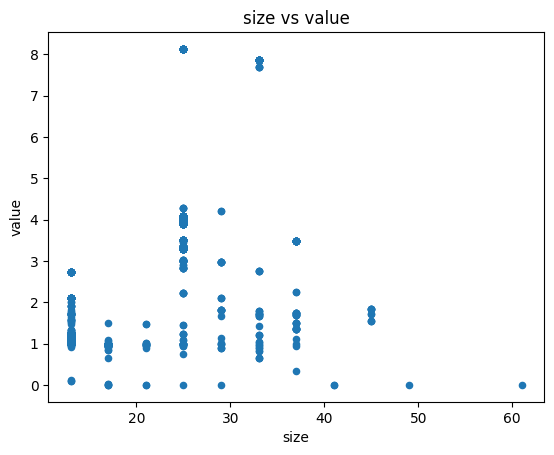

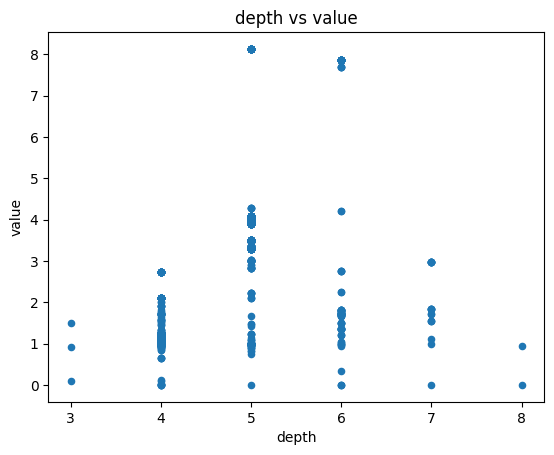

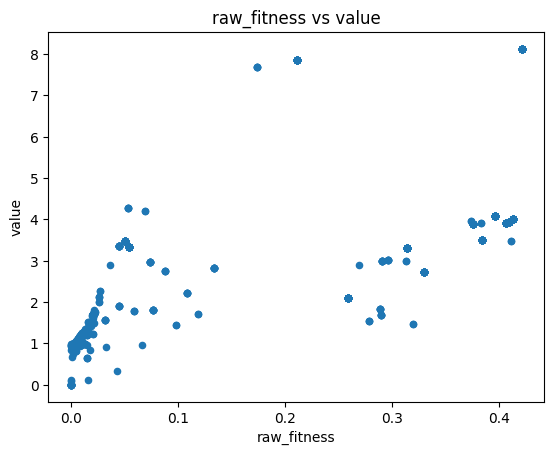

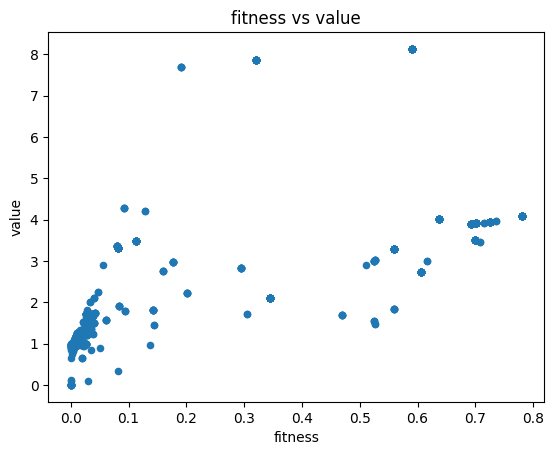

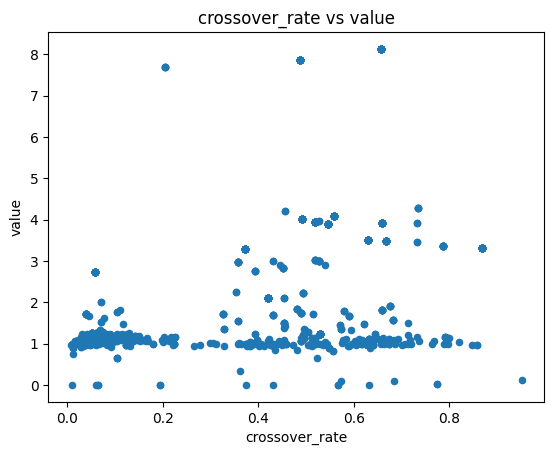

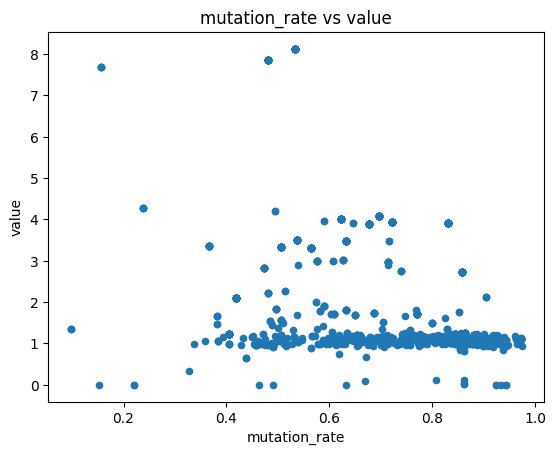

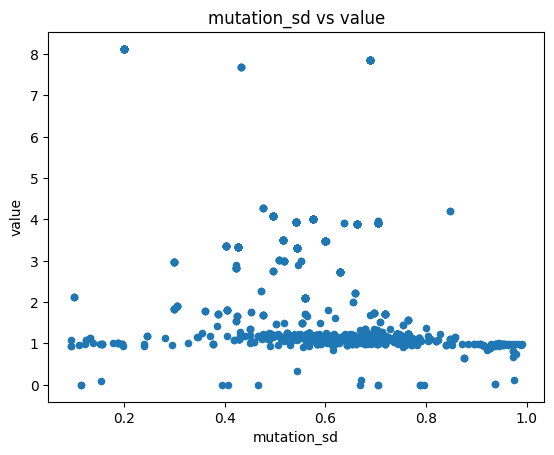

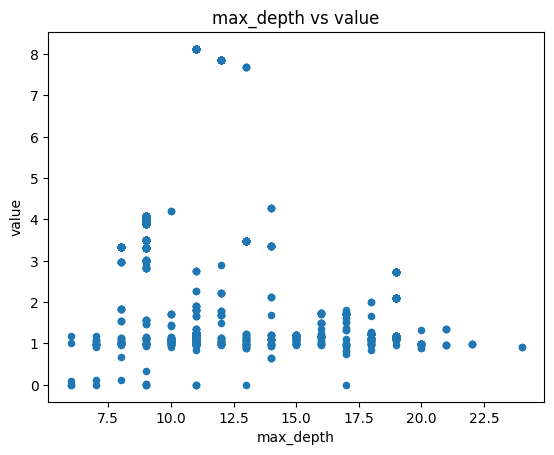

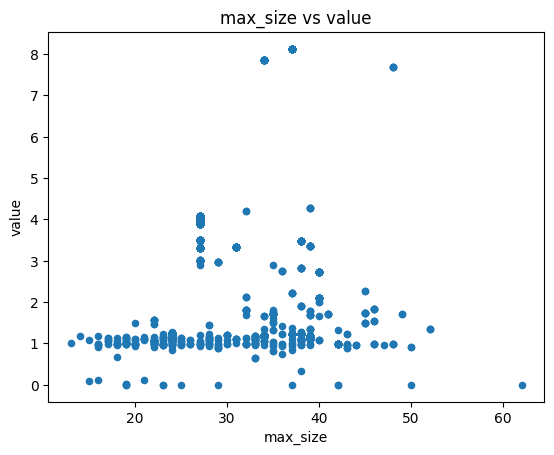

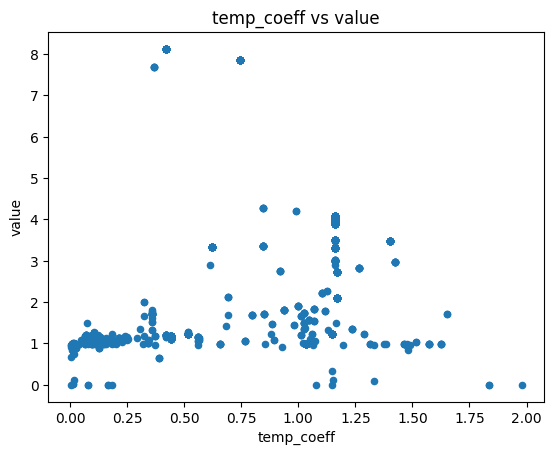

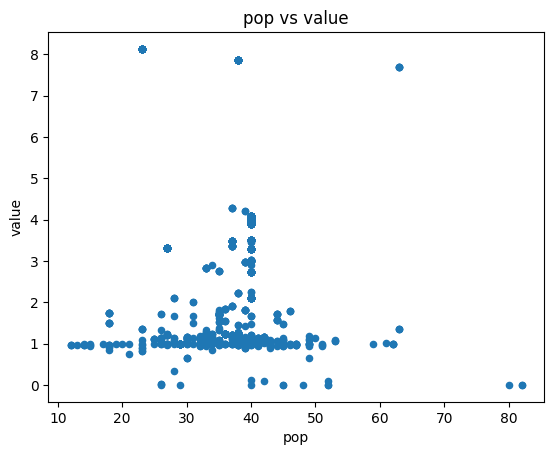

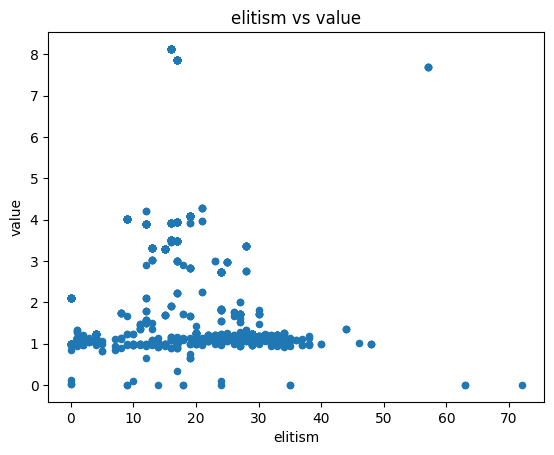

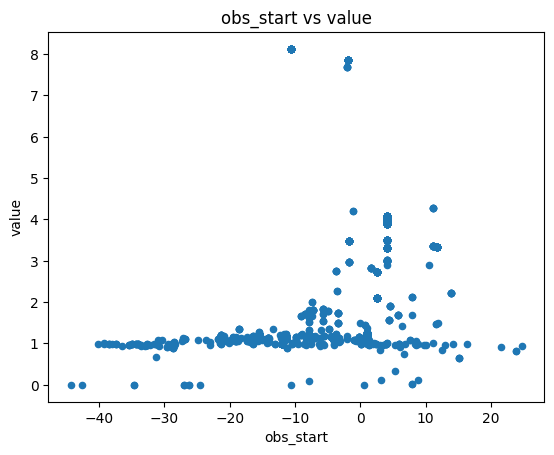

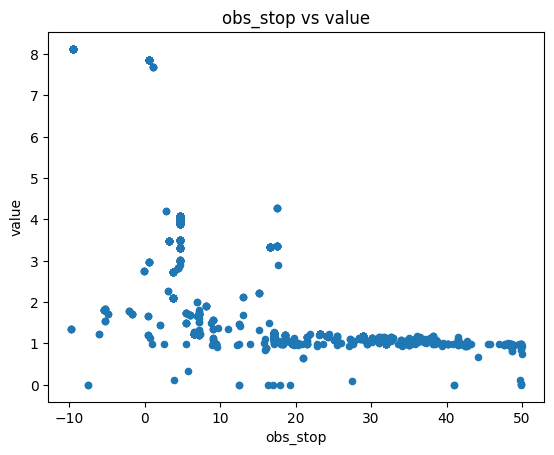

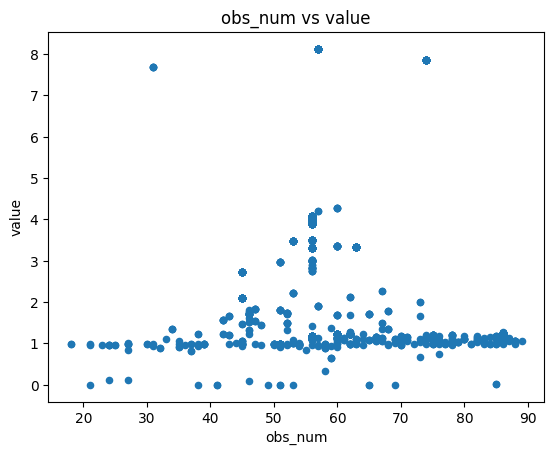

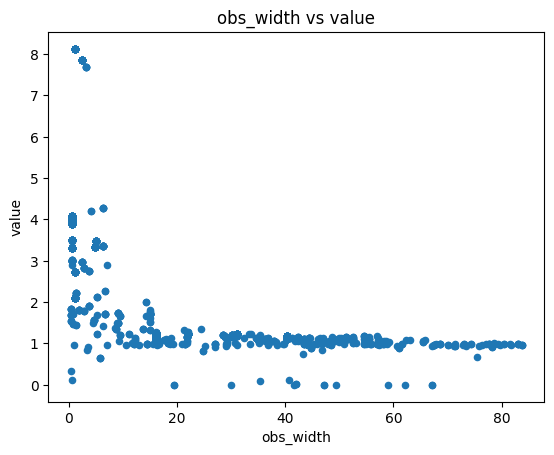

In [47]:
regress_all('value', data)

rmse


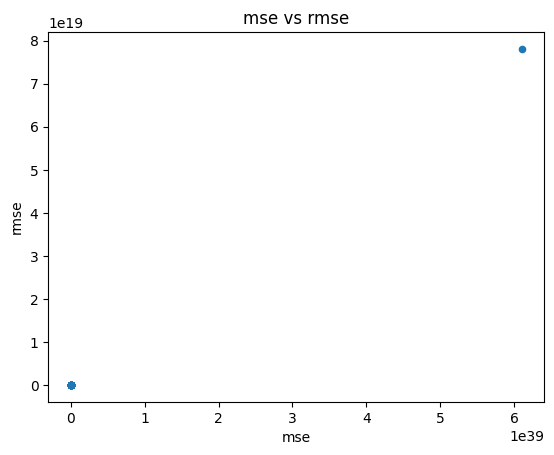

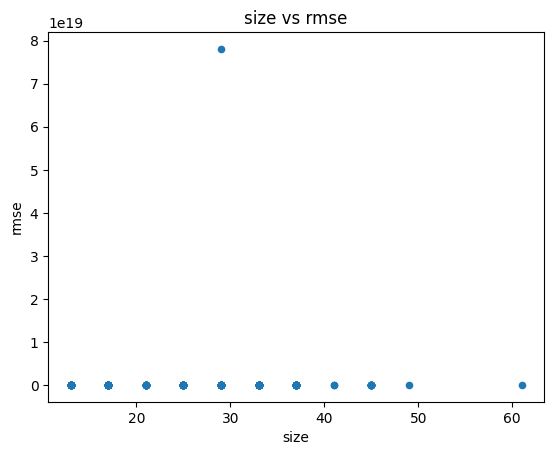

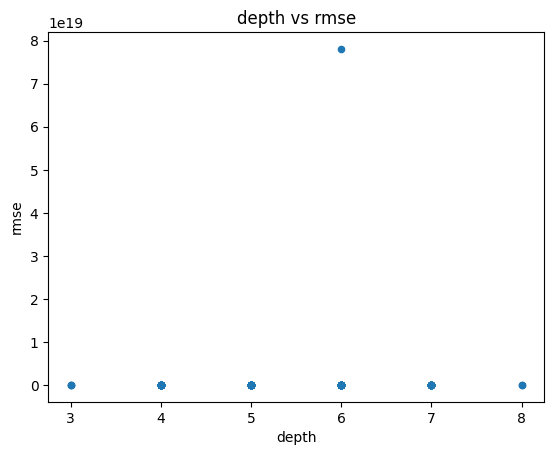

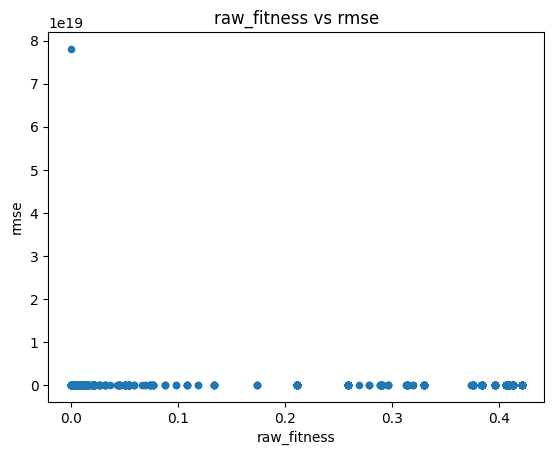

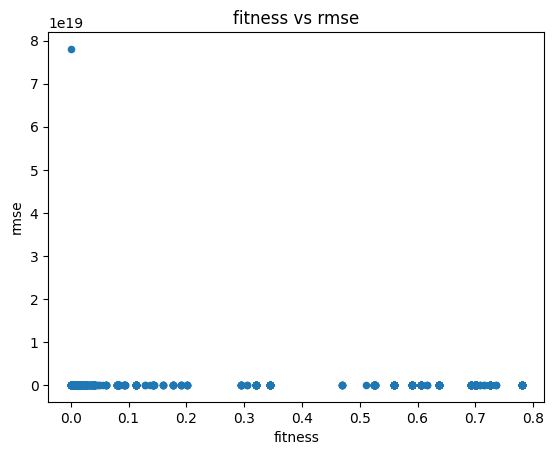

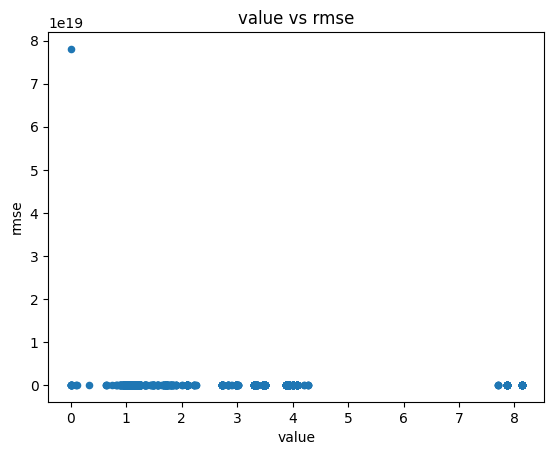

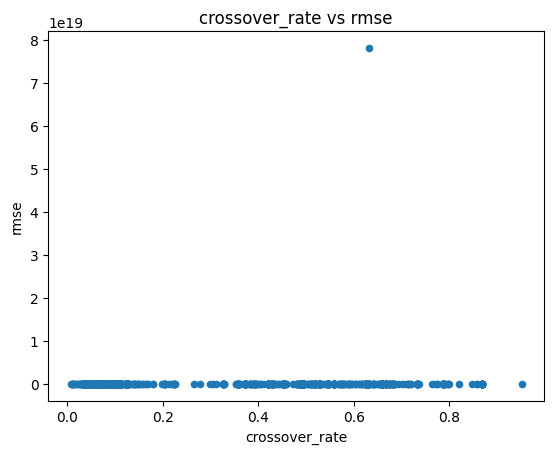

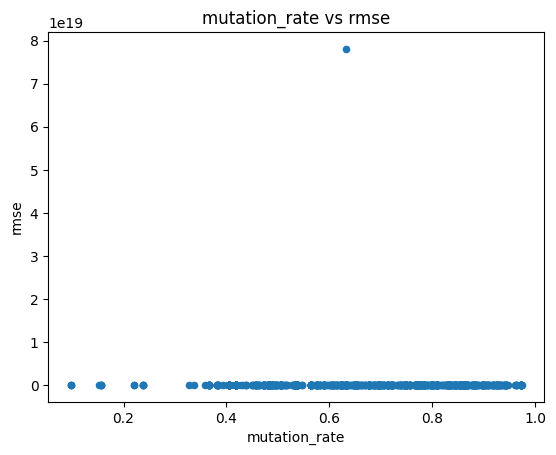

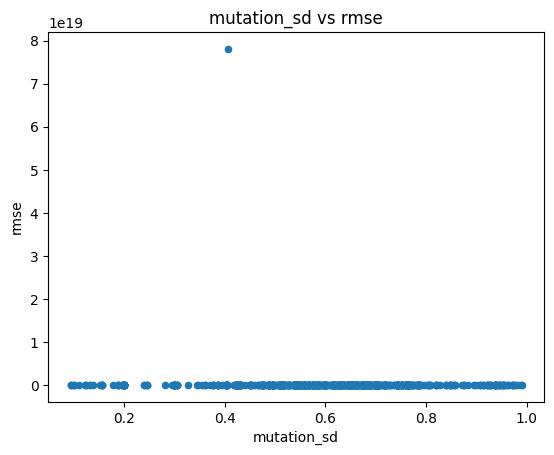

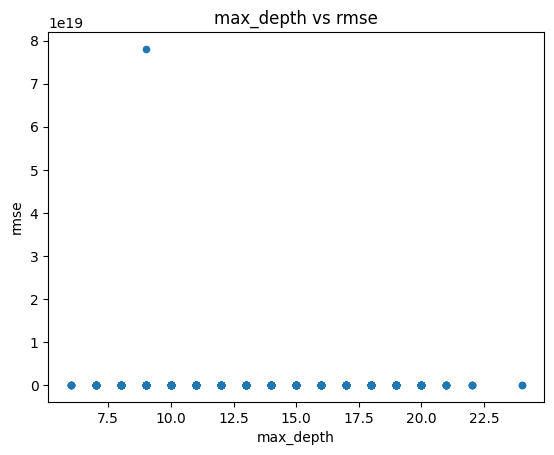

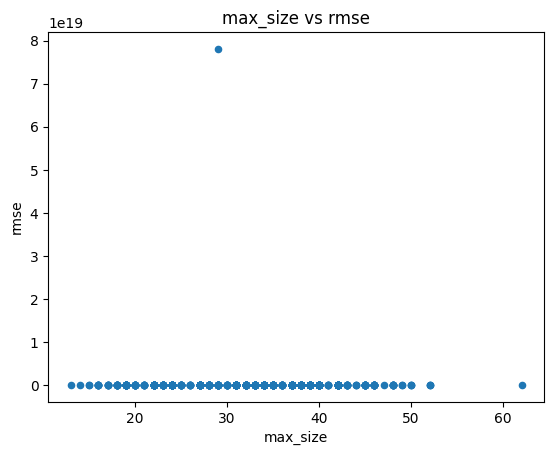

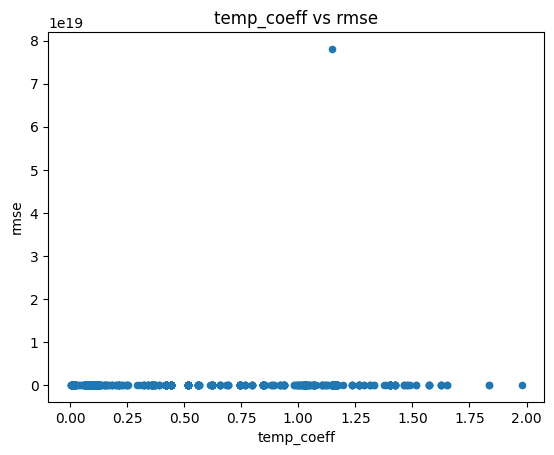

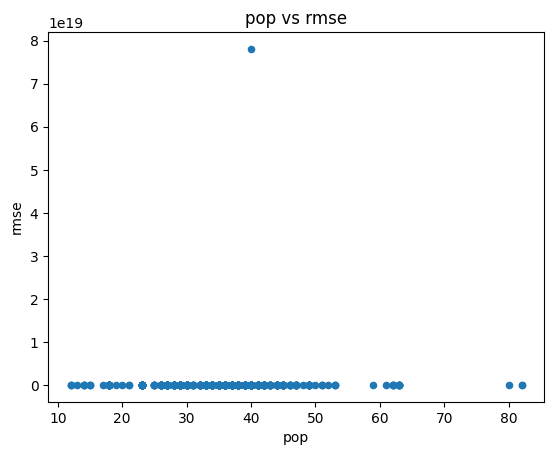

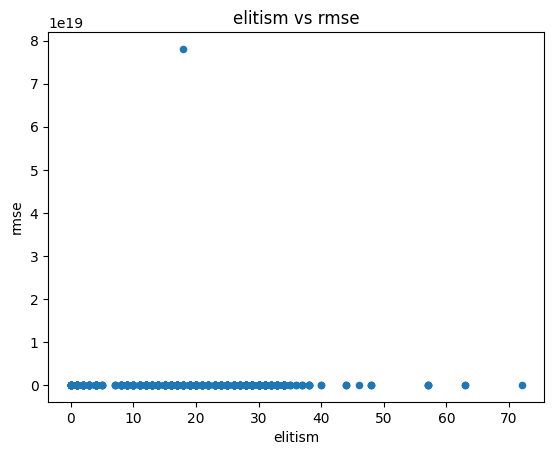

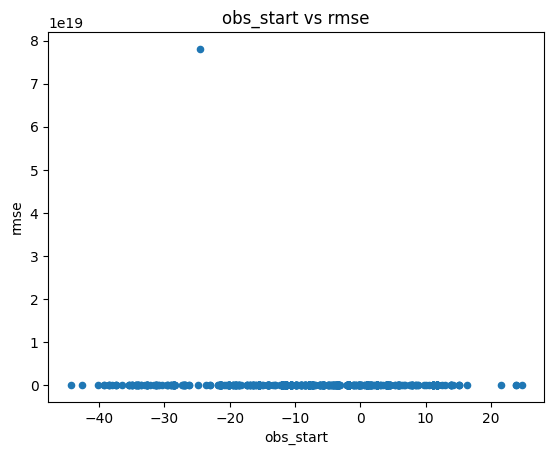

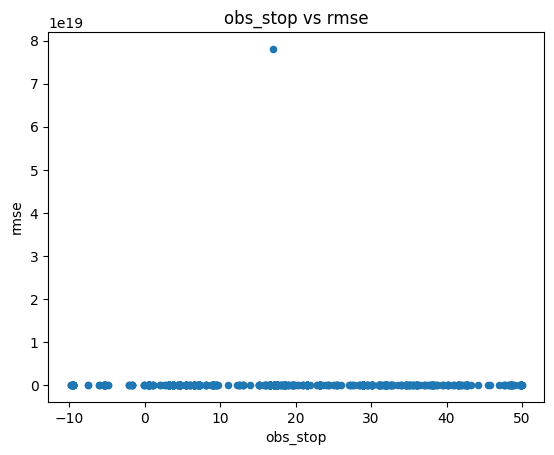

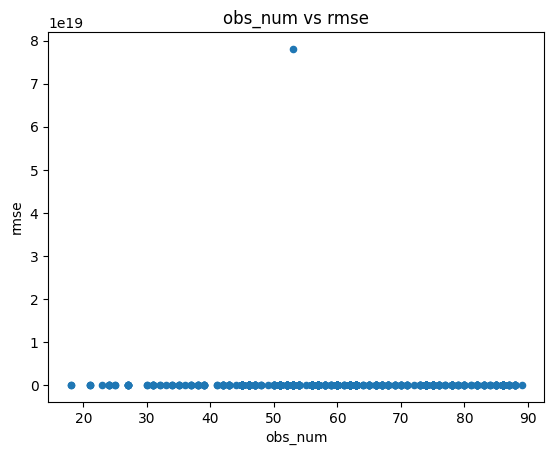

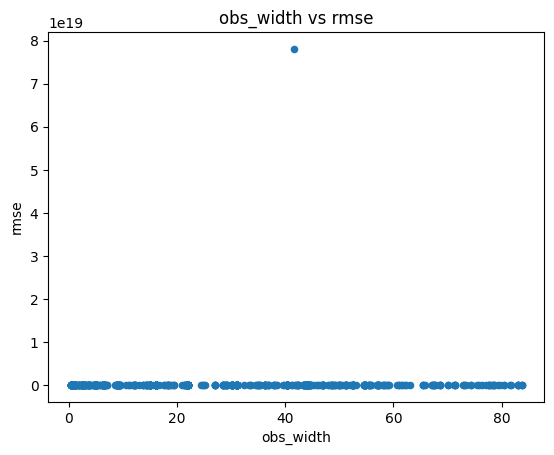

In [48]:
regress_all('rmse', data)

fitness


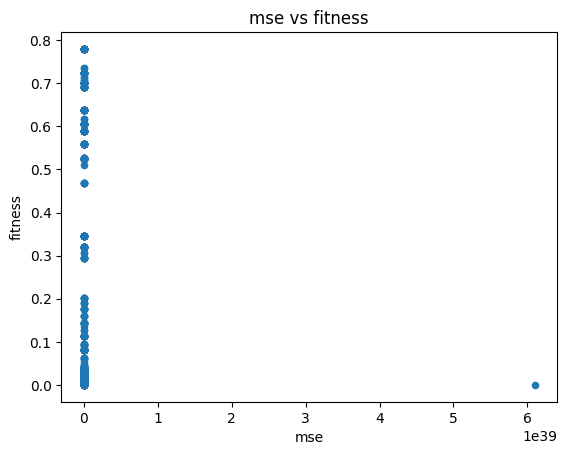

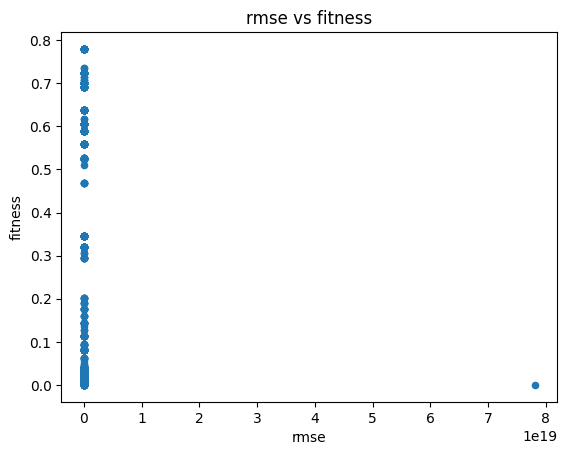

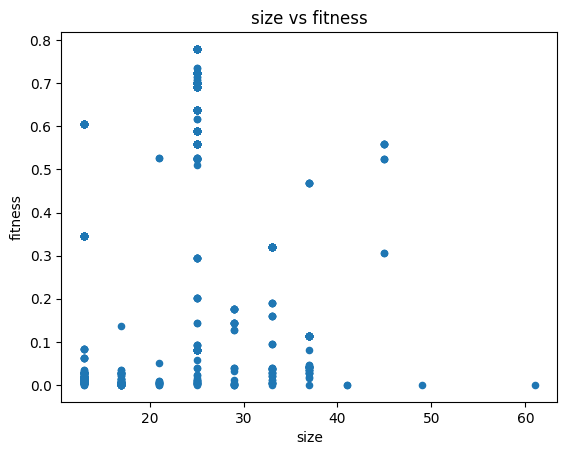

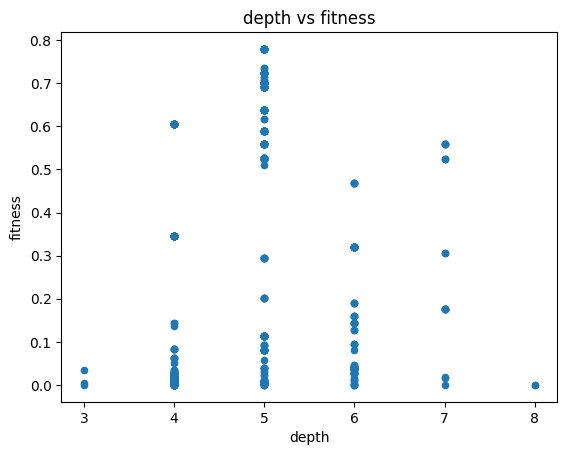

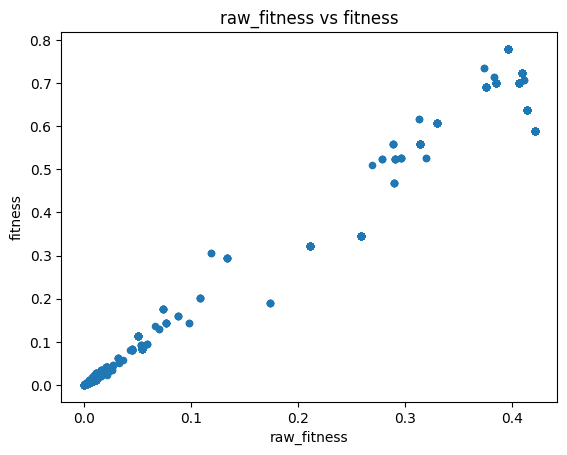

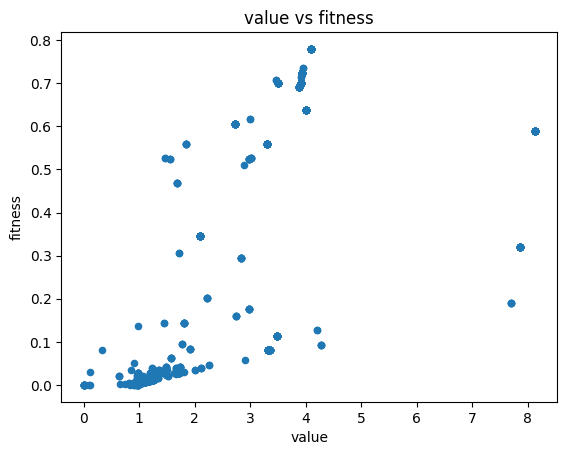

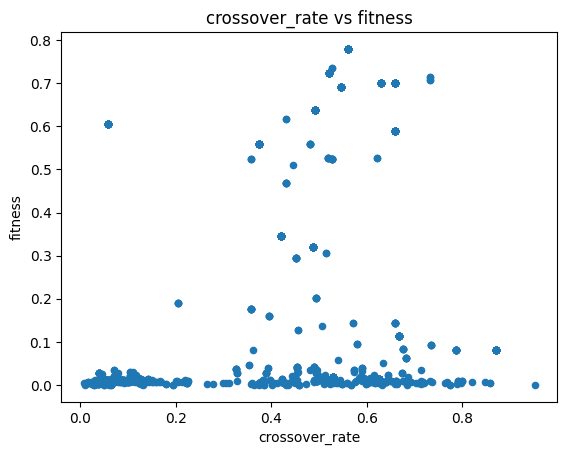

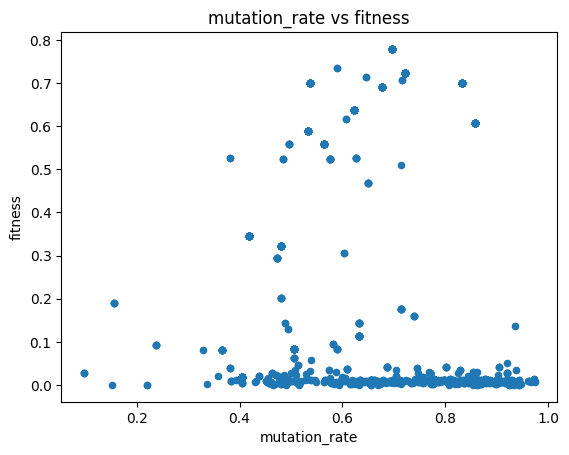

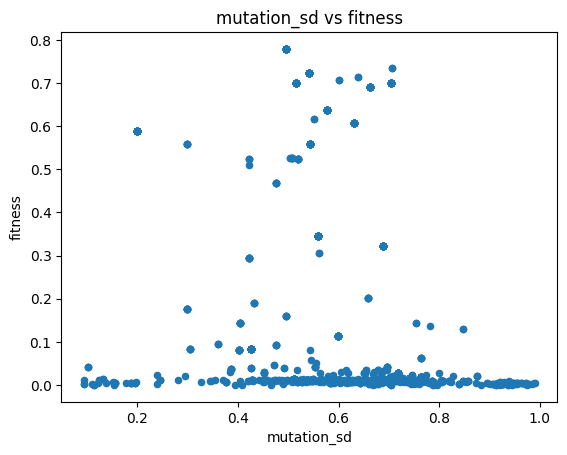

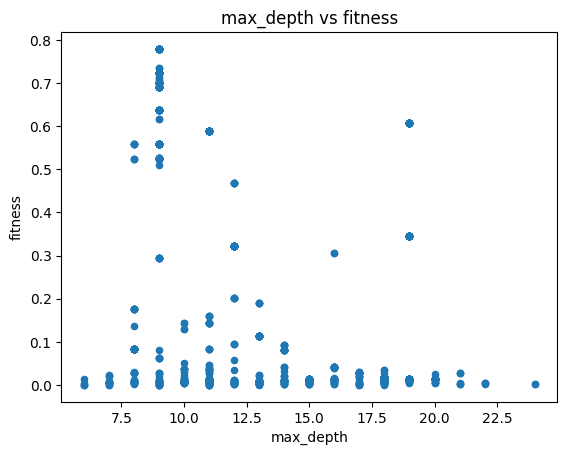

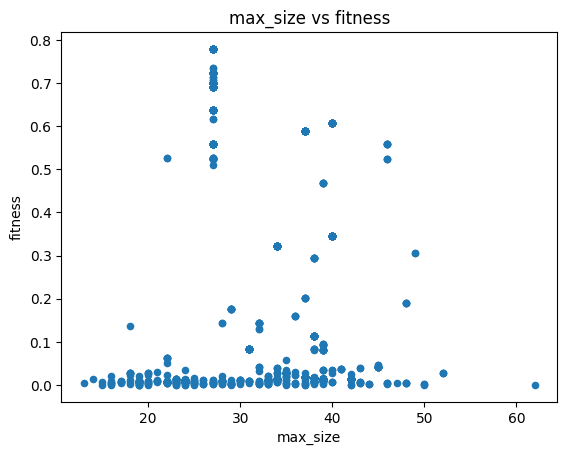

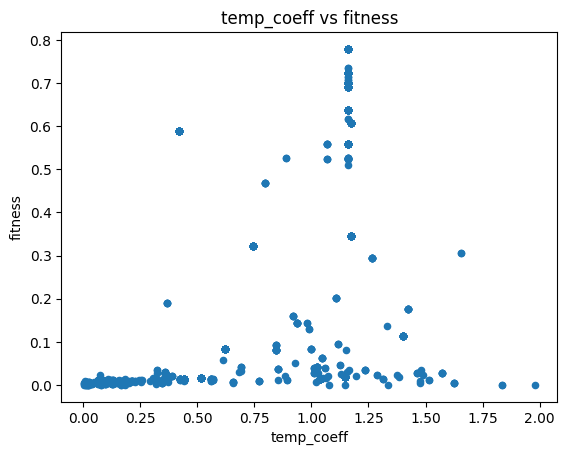

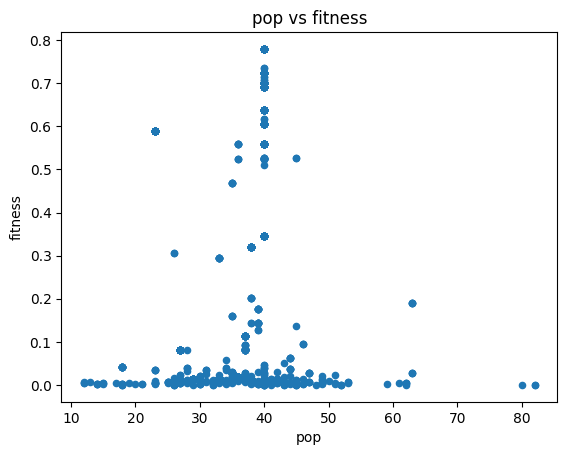

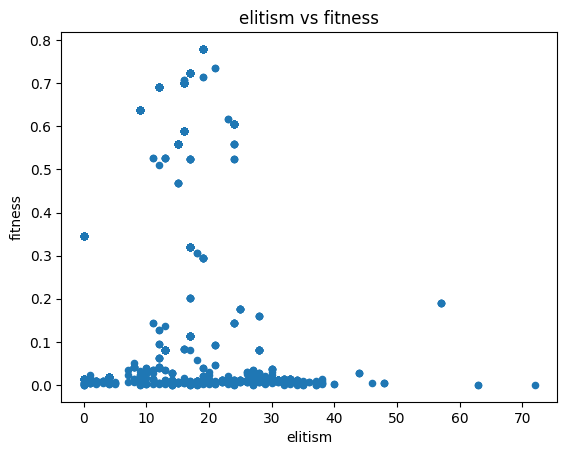

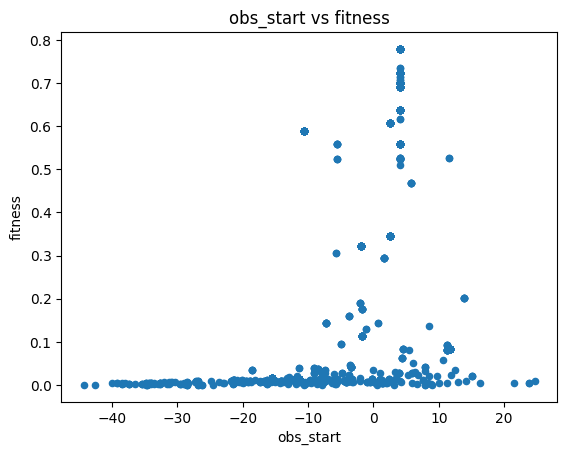

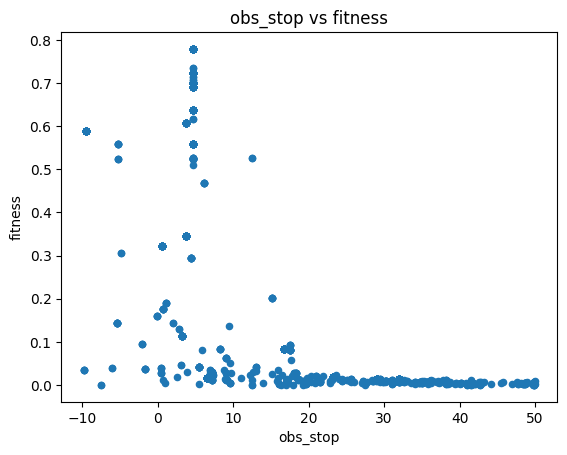

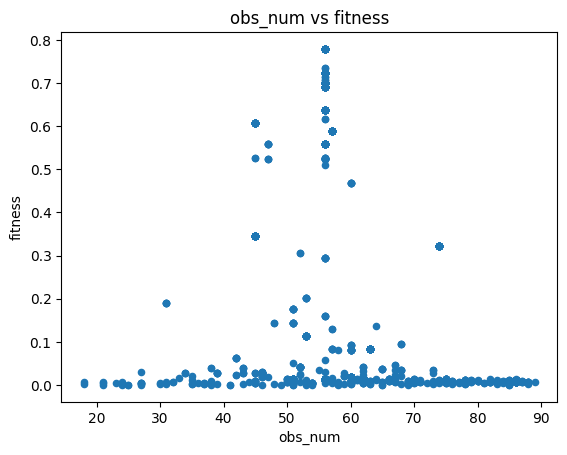

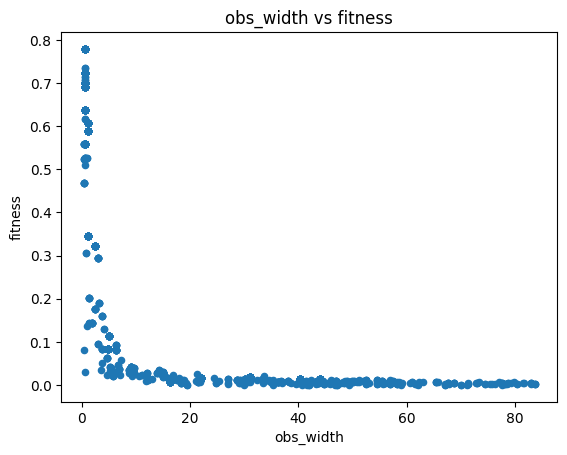

In [49]:
regress_all('fitness', data)

raw_fitness


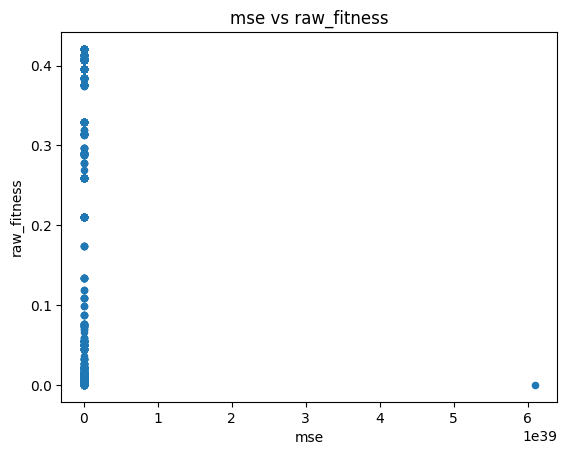

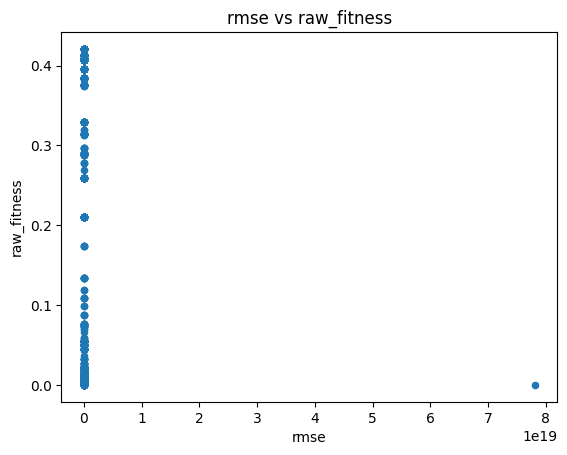

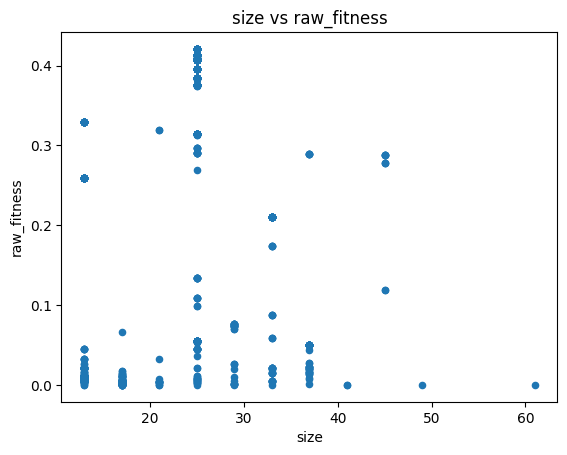

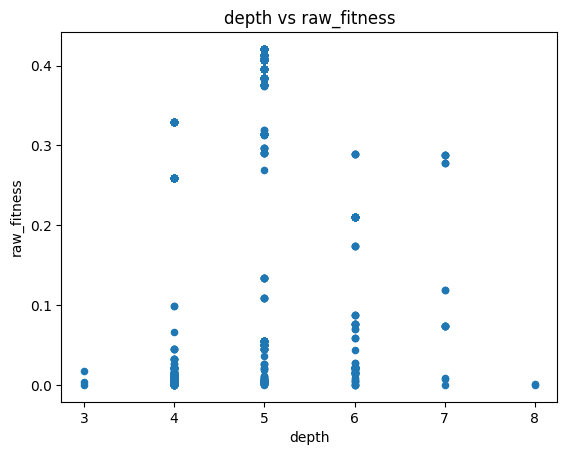

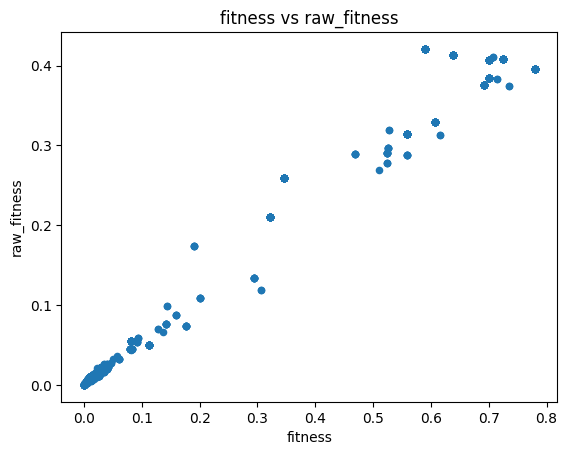

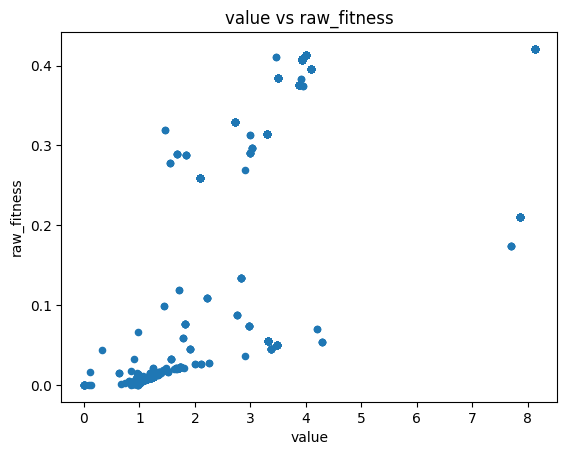

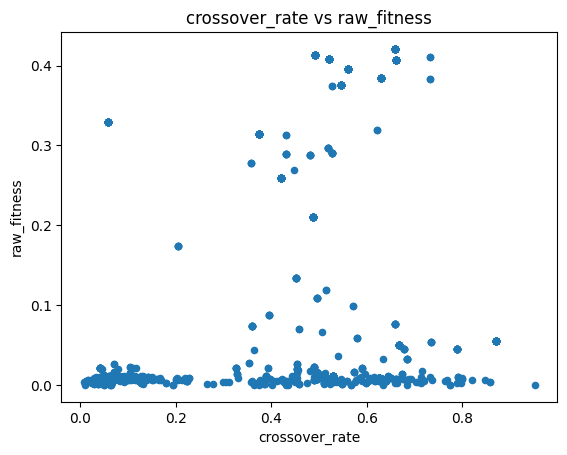

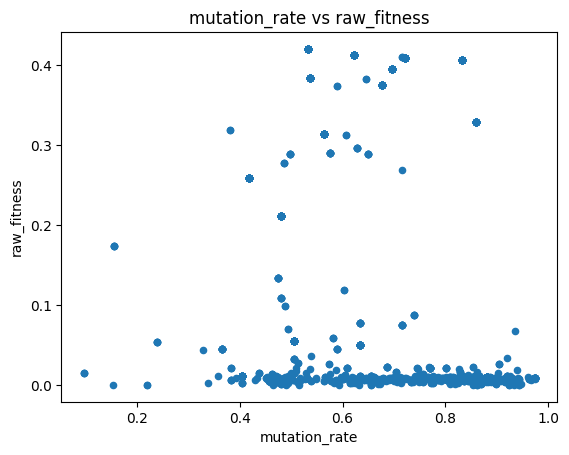

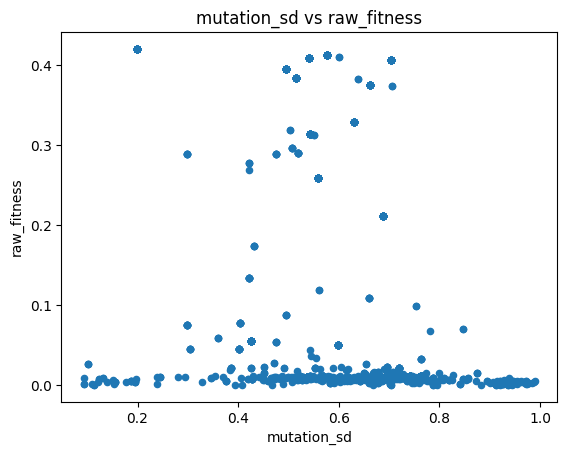

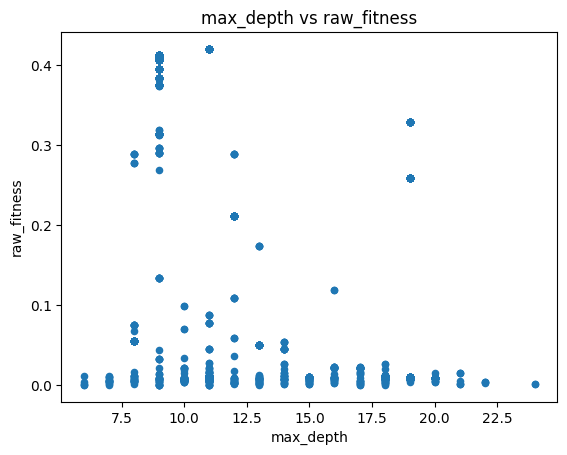

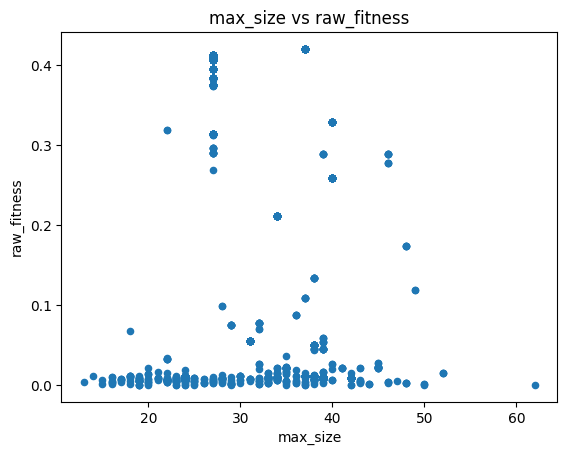

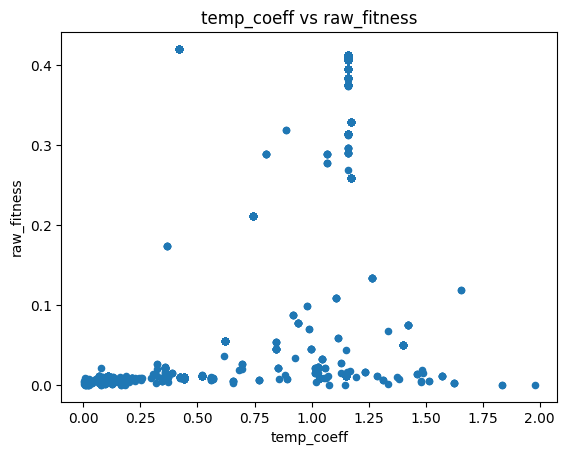

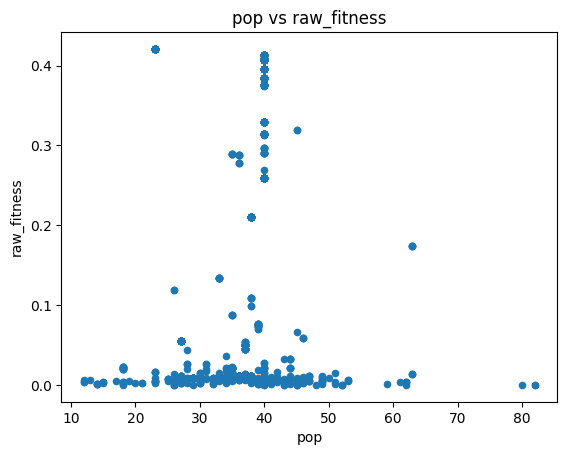

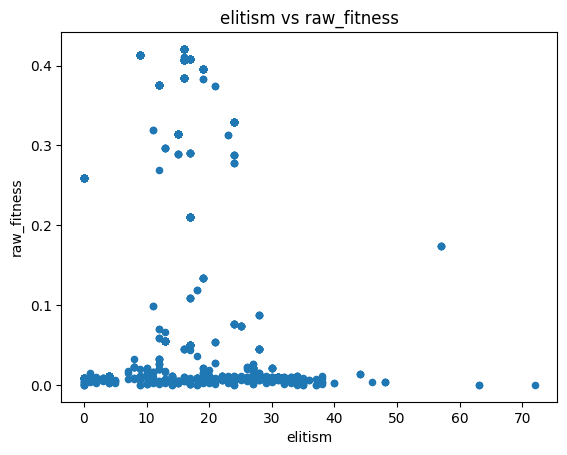

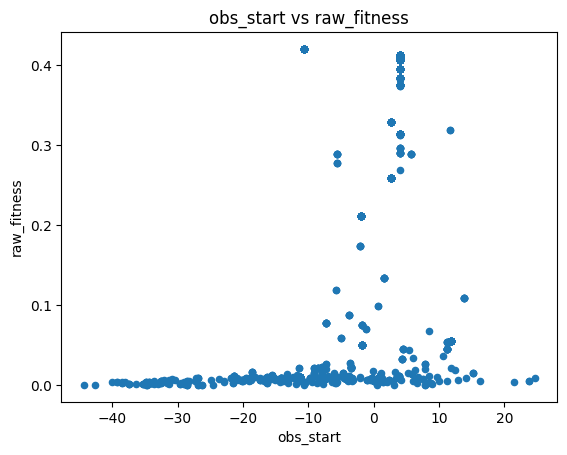

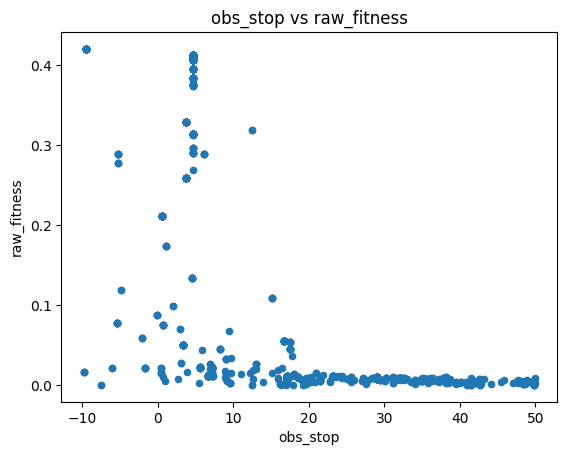

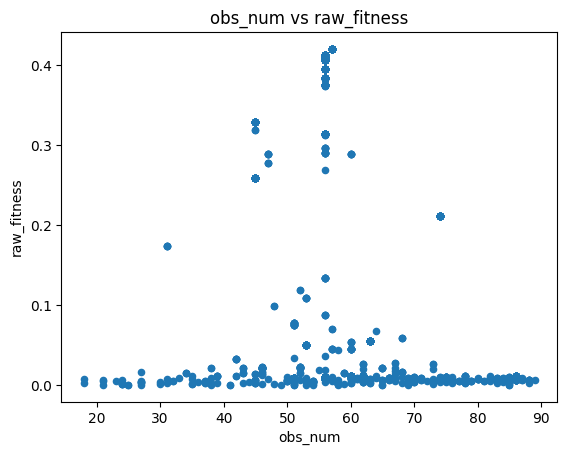

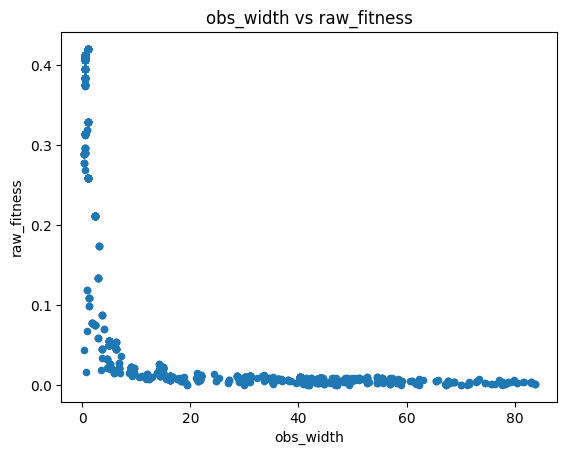

In [50]:
regress_all('raw_fitness', data)